In [1]:
!nvidia-smi

Fri Oct  4 07:59:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:01:00.0 Off |                  Off |
|  0%   53C    P8              32W / 450W |     38MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/athaya


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

In [4]:

from IPython.display import display, Image

In [5]:
pip show ultralytics

Name: ultralytics
Version: 8.3.4
Summary: Ultralytics YOLO for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: Ayush Chaurasia
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Install gdown untuk mendownload file dari Google Drive
!pip install gdown

import gdown
import zipfile
import os

# URL Direct Download Link Google Drive
#dari file/d/ ganti jadi uc?id= lalu /view?usp=sharing hapus
url = "https://drive.google.com/uc?id=1xvfMjGTFT5jK4pcJoTZHm-EP-oaQ3e6b"  # Ganti dengan direct download link Anda
#https://drive.google.com/file/d/1ChDMxp-KPbt3Hrei4F97vlBToNmQqeK8/view?usp=sharing

# Path untuk menyimpan file di Kaggle Notebook
output = "dataset.zip"

# Download file dari Google Drive
gdown.download(url, output, quiet=False)

# Unzip file
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(".")

# Optionally, hapus file zip setelah diekstrak
os.remove(output)

Downloading...
From (original): https://drive.google.com/uc?id=1xvfMjGTFT5jK4pcJoTZHm-EP-oaQ3e6b
From (redirected): https://drive.google.com/uc?id=1xvfMjGTFT5jK4pcJoTZHm-EP-oaQ3e6b&confirm=t&uuid=a036fe8c-3732-4d4e-a1d5-4fca873e4b18
To: /athaya/dataset.zip
100%|██████████| 3.17G/3.17G [01:15<00:00, 41.7MB/s]


## Anotasi

In [14]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 75.2 MB/s eta 0:00:00:00:0100:01


In [7]:
import os
from collections import defaultdict

# Fungsi untuk menghitung jumlah gambar per kelas berdasarkan file label
def count_images_per_class(label_dir):
    class_count = defaultdict(int)

    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            label_path = os.path.join(label_dir, label_file)
            with open(label_path, 'r') as f:
                lines = f.readlines()
                if lines:
                    class_id = int(lines[0].split()[0])  # Ambil digit pertama (class_id)
                    class_count[class_id] += 1

    return class_count

# Fungsi untuk menghitung total per subset (train, valid, test)
def count_all_images(dataset_dir):
    subsets = ['train', 'valid', 'test']
    total_count = {}

    for subset in subsets:
        label_dir = os.path.join(dataset_dir, subset, 'labels')
        count_per_class = count_images_per_class(label_dir)
        total_count[subset] = count_per_class

    return total_count

# Jalankan fungsi
dataset_dir = 'datasets'  # Ganti dengan path ke dataset-mu
class_counts = count_all_images(dataset_dir)

# Tampilkan hasil
for subset, counts in class_counts.items():
    print(f"\nJumlah gambar per kelas di folder {subset}:")
    for class_id, count in counts.items():
        print(f"Class {class_id}: {count} images")



Jumlah gambar per kelas di folder train:
Class 0: 4510 images
Class 1: 4462 images
Class 2: 4488 images
Class 3: 4498 images
Class 4: 4368 images
Class 5: 4683 images
Class 6: 4521 images
Class 7: 4501 images
Class 8: 4749 images

Jumlah gambar per kelas di folder valid:
Class 0: 186 images
Class 1: 181 images
Class 2: 200 images
Class 3: 194 images
Class 4: 189 images
Class 6: 192 images
Class 7: 185 images
Class 5: 197 images
Class 8: 200 images

Jumlah gambar per kelas di folder test:
Class 0: 45 images
Class 1: 45 images
Class 2: 50 images
Class 3: 49 images
Class 4: 46 images
Class 6: 48 images
Class 7: 49 images
Class 8: 50 images
Class 5: 49 images


## Prepare

In [8]:
!ls

16.ipynb  Untitled.ipynb  data.yaml  datasets


In [9]:
%cd datasets

/athaya/datasets


/opt/conda/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [10]:
!ls

test  train  valid


In [11]:
cd {HOME}

/athaya


In [12]:
# prompt: hitung jumlah gambar di folder train dan valid

import os

train_image_dir = 'datasets/train/images'
val_image_dir = 'datasets/valid/images'
test_image_dir = 'datasets/test/images'

train_label_dir = 'datasets/train/labels'
val_label_dir = 'datasets/valid/labels'
test_label_dir = 'datasets/test/labels'

num_train_images = len([f for f in os.listdir(train_image_dir) if f.endswith('.jpg')])
num_val_images = len([f for f in os.listdir(val_image_dir) if f.endswith('.jpg')])
num_test_images = len([f for f in os.listdir(test_image_dir) if f.endswith('.jpg')])

num_train_labels = len([f for f in os.listdir(train_label_dir) if f.endswith('.txt')])
num_val_labels = len([f for f in os.listdir(val_label_dir) if f.endswith('.txt')])
num_test_labels = len([f for f in os.listdir(test_label_dir) if f.endswith('.txt')])

print("Number of images in train:", num_train_images)
print("Number of labels in train:", num_train_labels)
print("Number of images in valid:", num_val_images)
print("Number of labels in valid:", num_val_labels)
print("Number of images in test:", num_test_images)
print("Number of labels in test:", num_test_labels)

Number of images in train: 40780
Number of labels in train: 40780
Number of images in valid: 1724
Number of labels in valid: 1724
Number of images in test: 431
Number of labels in test: 431


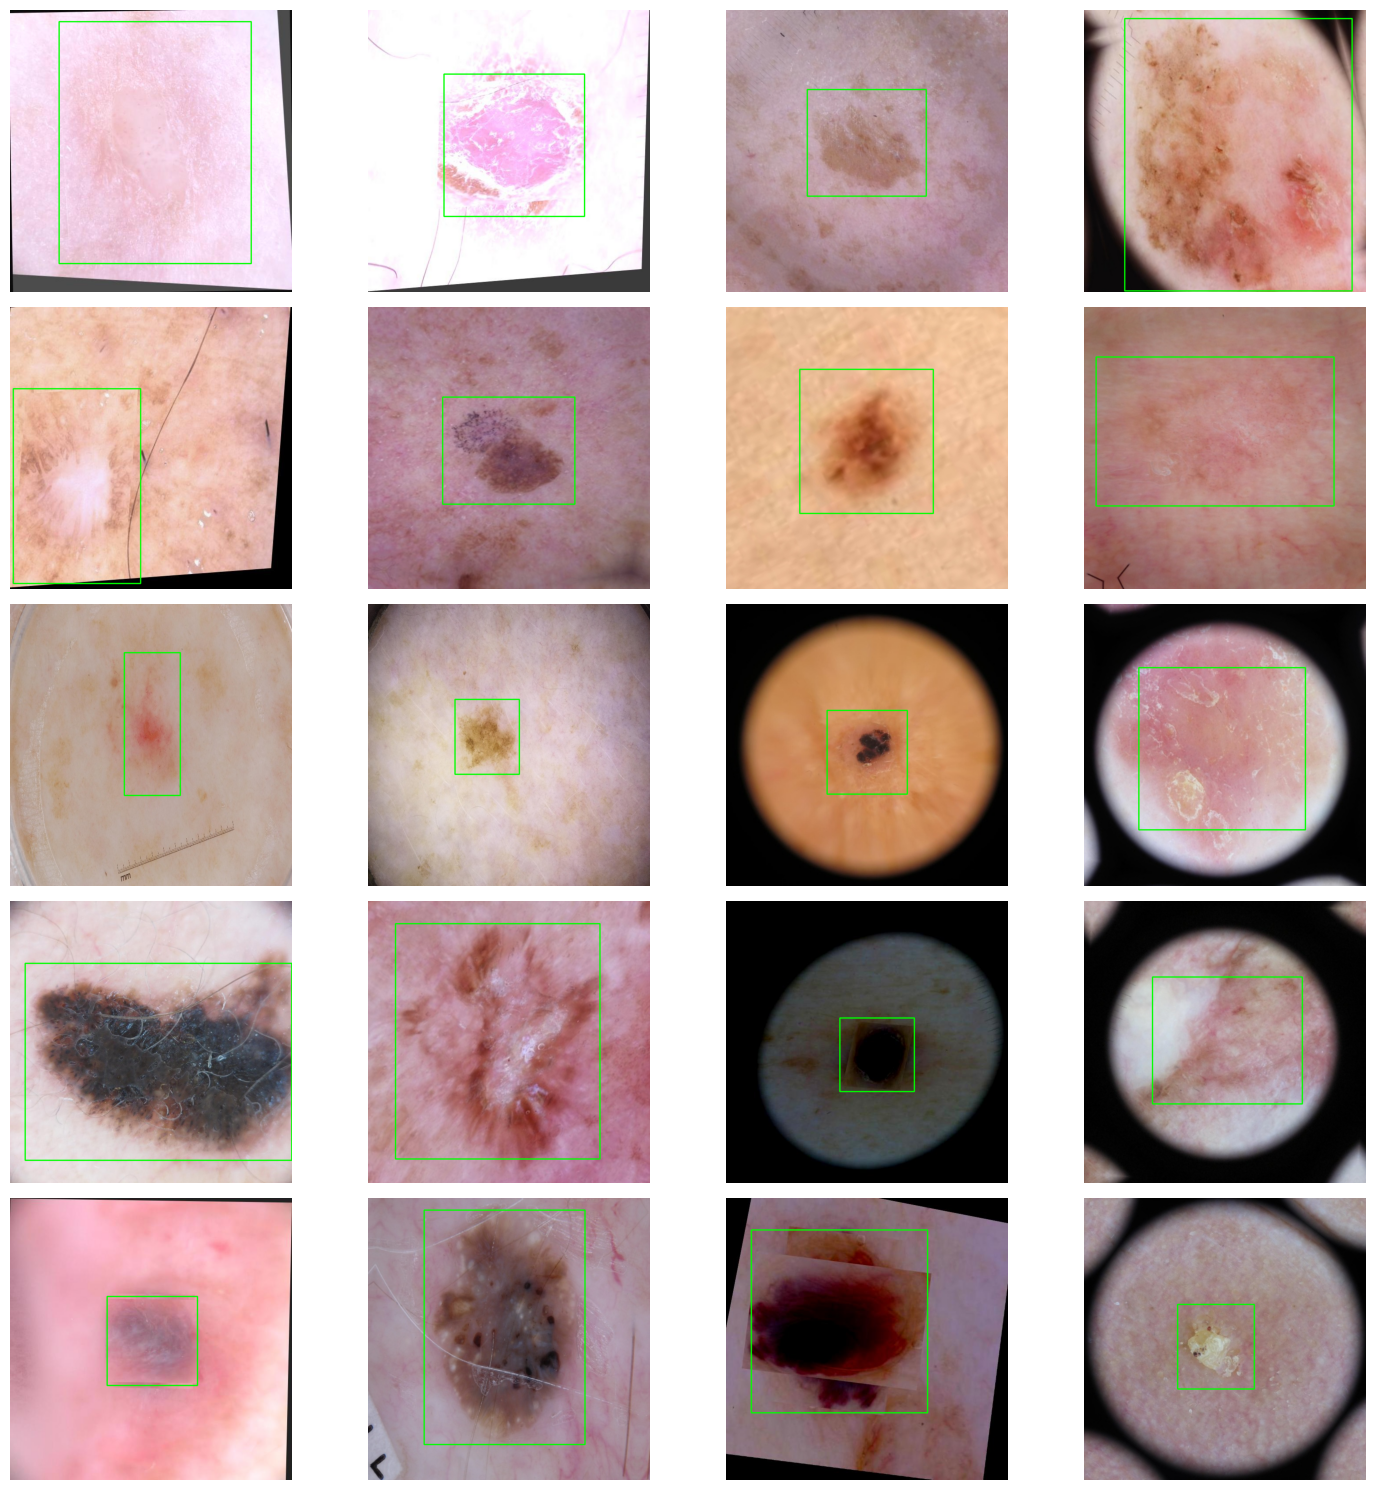

In [15]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk membaca bounding box dari file YOLO format
def read_yolo_labels(label_file, img_w, img_h):
    boxes = []
    with open(label_file, 'r') as f:
        for line in f.readlines():
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())
            x_center = int(x_center * img_w)
            y_center = int(y_center * img_h)
            bbox_width = int(bbox_width * img_w)
            bbox_height = int(bbox_height * img_h)
            x1 = int(x_center - bbox_width / 2)
            y1 = int(y_center - bbox_height / 2)
            x2 = int(x_center + bbox_width / 2)
            y2 = int(y_center + bbox_height / 2)
            boxes.append((x1, y1, x2, y2))
    return boxes

# Fungsi untuk menampilkan gambar beserta bounding box-nya
def display_image_with_boxes(ax, image_path, label_path):
    img = cv2.imread(image_path)
    img_h, img_w, _ = img.shape

    # Baca bounding box dari file label
    boxes = read_yolo_labels(label_path, img_w, img_h)

    # Gambarkan bounding box di gambar
    for box in boxes:
        x1, y1, x2, y2 = box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Kotak hijau

    # Ubah BGR ke RGB untuk matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Tampilkan gambar
    ax.imshow(img_rgb)
    ax.axis('off')  # Hilangkan axis

# Fungsi untuk memilih secara acak 20 gambar dari folder dataset
def show_random_images_with_boxes(dataset_dir, num_images=20):
    # List semua folder: train, valid, test
    subsets = ['train', 'valid', 'test']
    
    # List semua file gambar
    image_paths = []
    for subset in subsets:
        image_dir = os.path.join(dataset_dir, subset, 'images')
        label_dir = os.path.join(dataset_dir, subset, 'labels')
        for image_file in os.listdir(image_dir):
            image_paths.append((os.path.join(image_dir, image_file), os.path.join(label_dir, image_file.replace('.jpg', '.txt'))))

    # Ambil 20 gambar secara acak
    random_images = random.sample(image_paths, num_images)

    # Setup figure dan axis untuk grid 4 kolom dan 5 baris
    fig, axs = plt.subplots(5, 4, figsize=(15, 15))  # 5 baris, 4 kolom
    
    axs = axs.ravel()  # Flatten axes menjadi list

    # Tampilkan setiap gambar dengan bounding box
    for i, (image_path, label_path) in enumerate(random_images):
        display_image_with_boxes(axs[i], image_path, label_path)
    
    plt.tight_layout()
    plt.show()

# Jalankan fungsi
dataset_dir = 'datasets'  # Ganti dengan path ke dataset-mu
show_random_images_with_boxes(dataset_dir)


## Training

In [21]:
import numpy as np

In [23]:
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"

In [25]:
import os
os.environ["MKL_SERVICE_FORCE_INTEL"] = "1"

In [27]:
%cd {HOME}
!yolo task=detect mode=train data=data.yaml model=yolov8l.pt epochs=50 imgsz=640 batch=32 device=0,1

/athaya
Ultralytics 8.3.4 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
                                                CUDA:1 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

In [28]:
!ls {HOME}/runs/detect/train/

F1_curve.png			 labels_correlogram.jpg  train_batch51002.jpg
PR_curve.png			 results.csv		 val_batch0_labels.jpg
P_curve.png			 results.png		 val_batch0_pred.jpg
R_curve.png			 train_batch0.jpg	 val_batch1_labels.jpg
args.yaml			 train_batch1.jpg	 val_batch1_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch51000.jpg	 val_batch2_pred.jpg
labels.jpg			 train_batch51001.jpg	 weights


/athaya


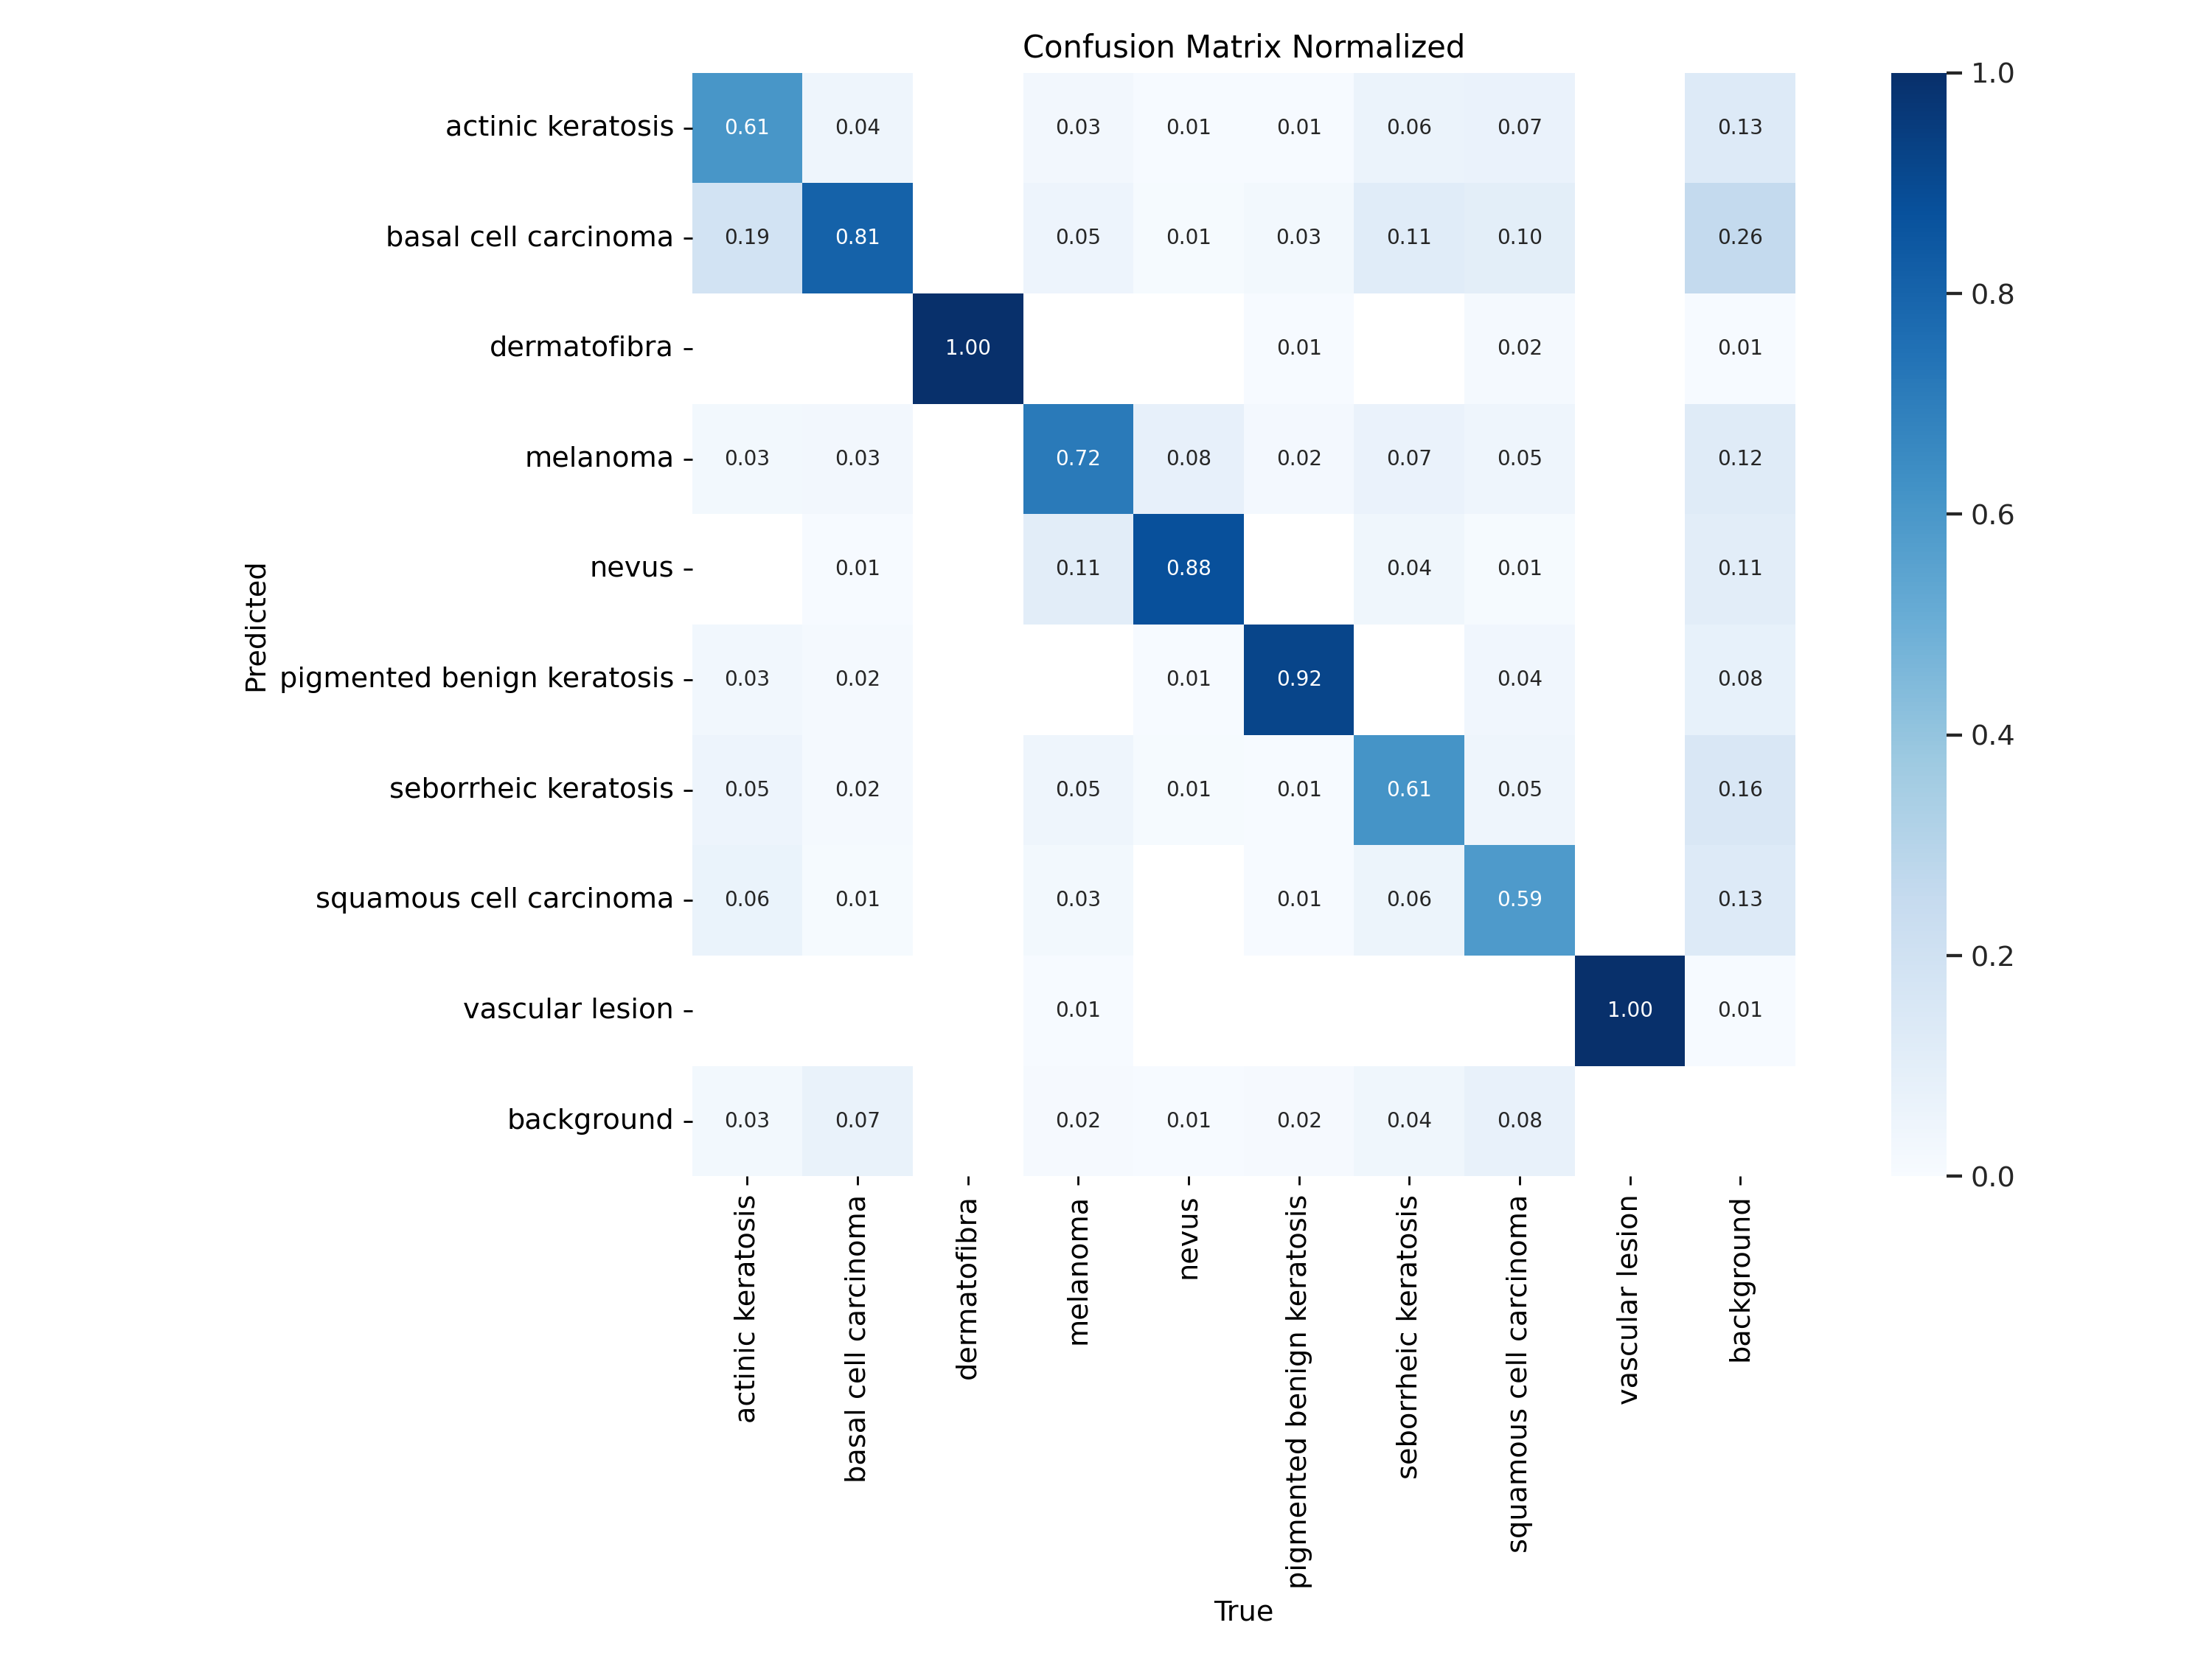

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=800)

/athaya


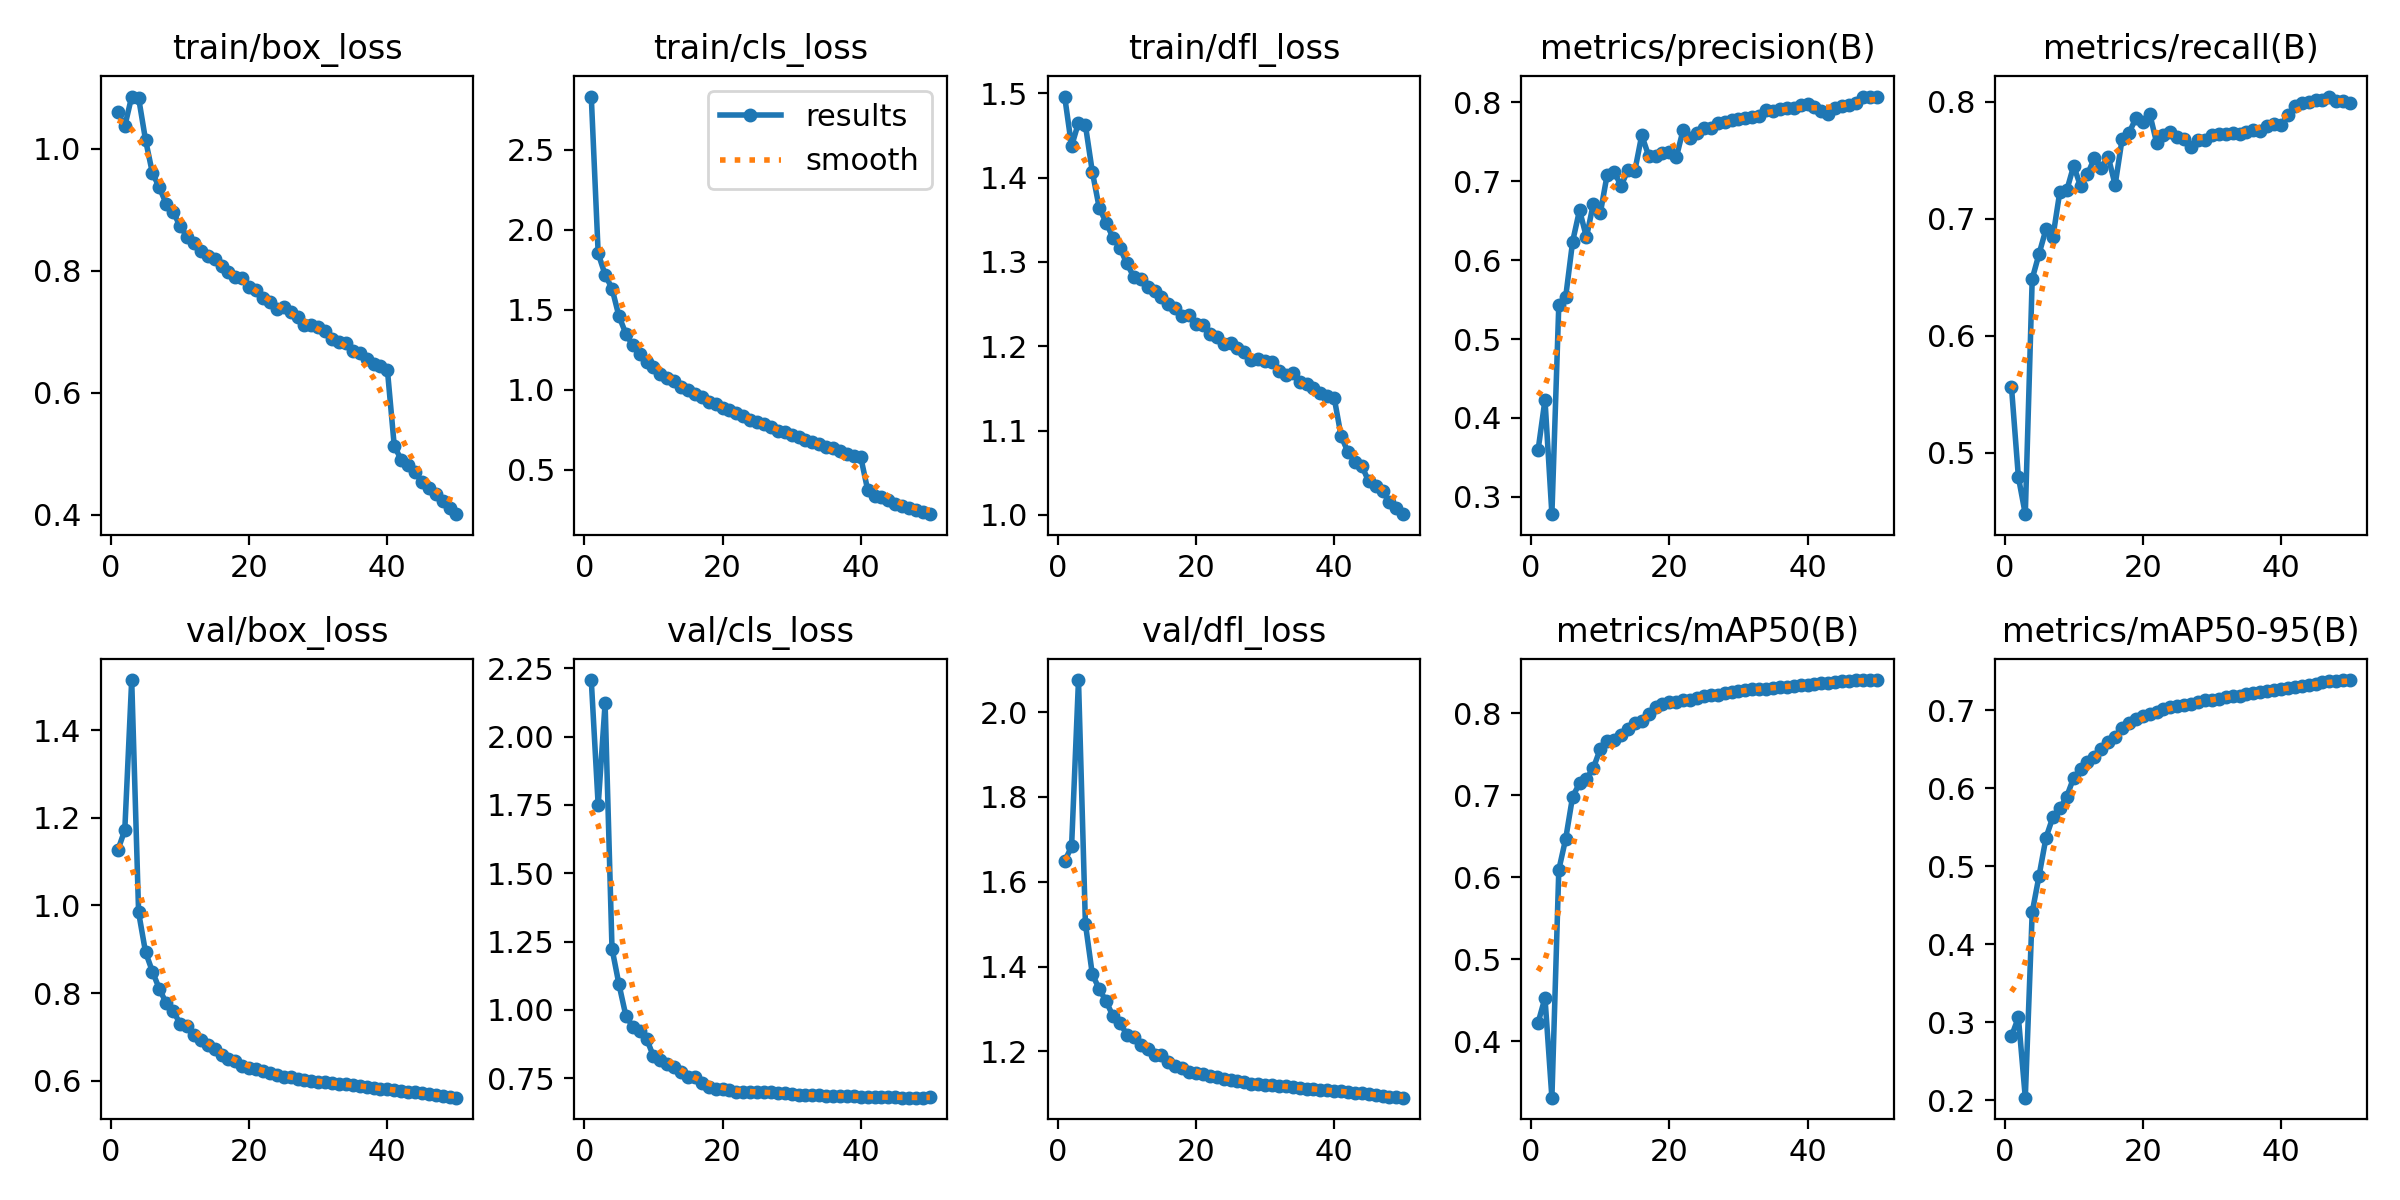

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/athaya


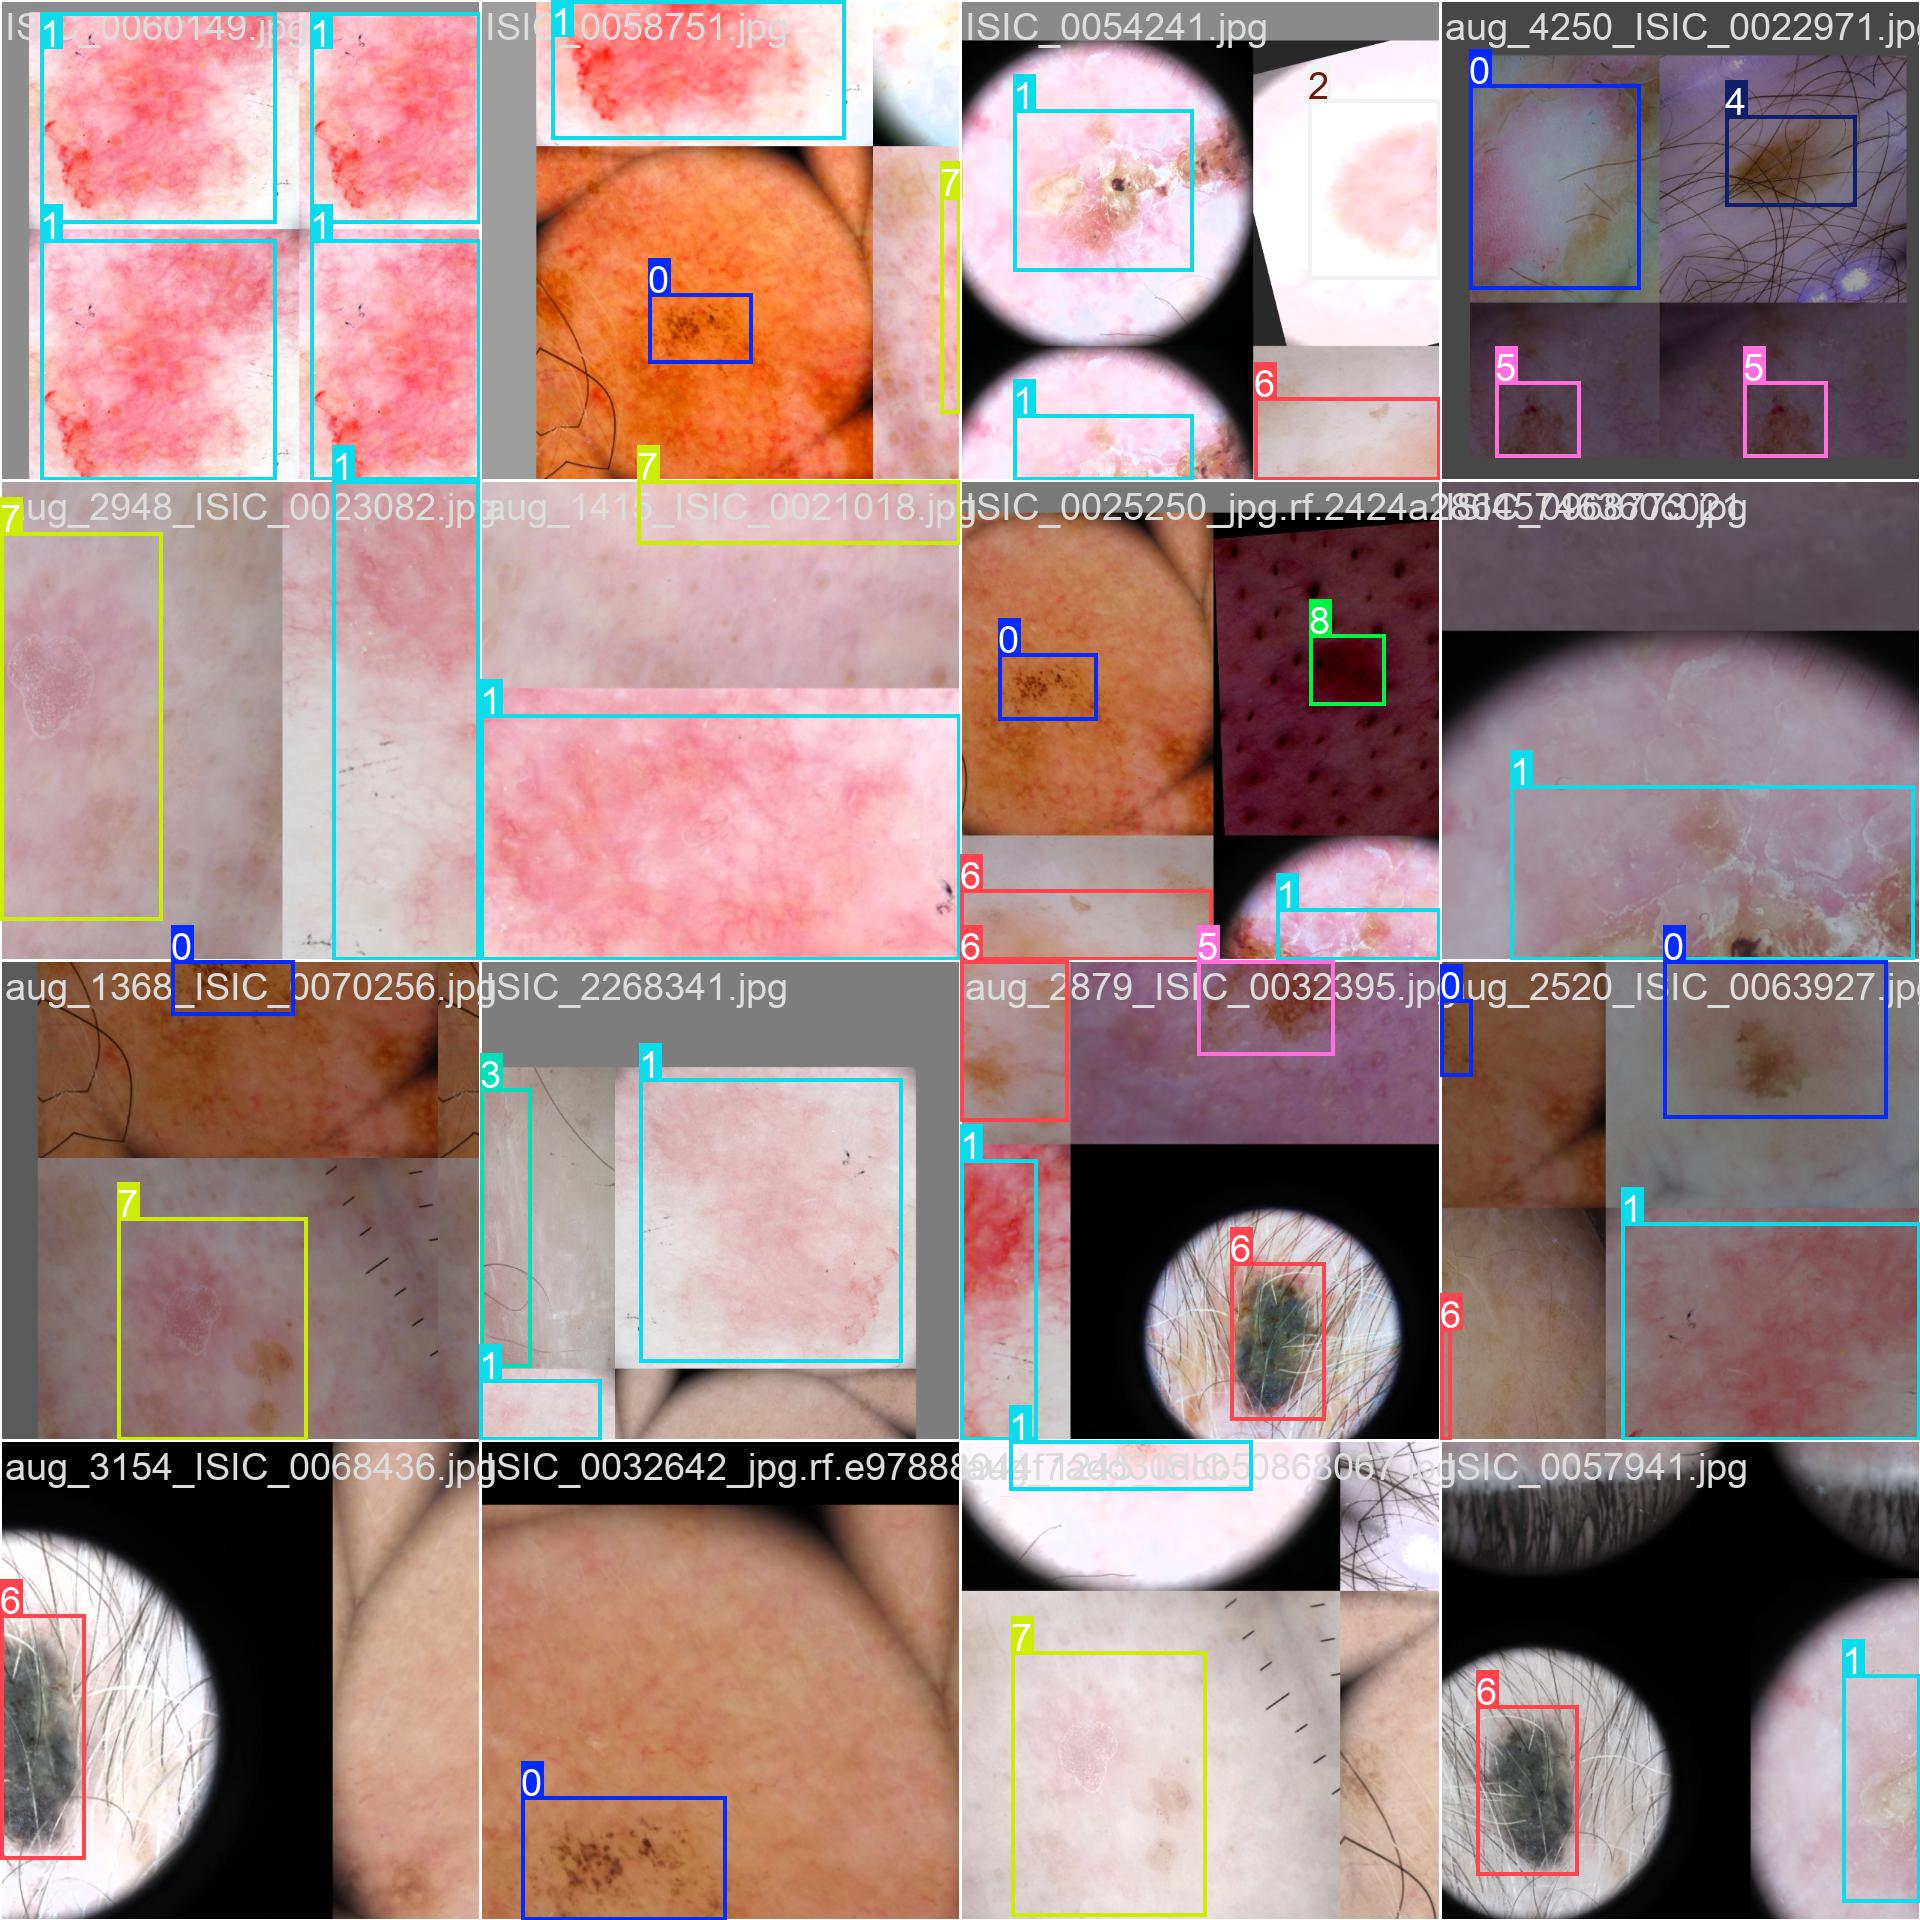

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

/athaya


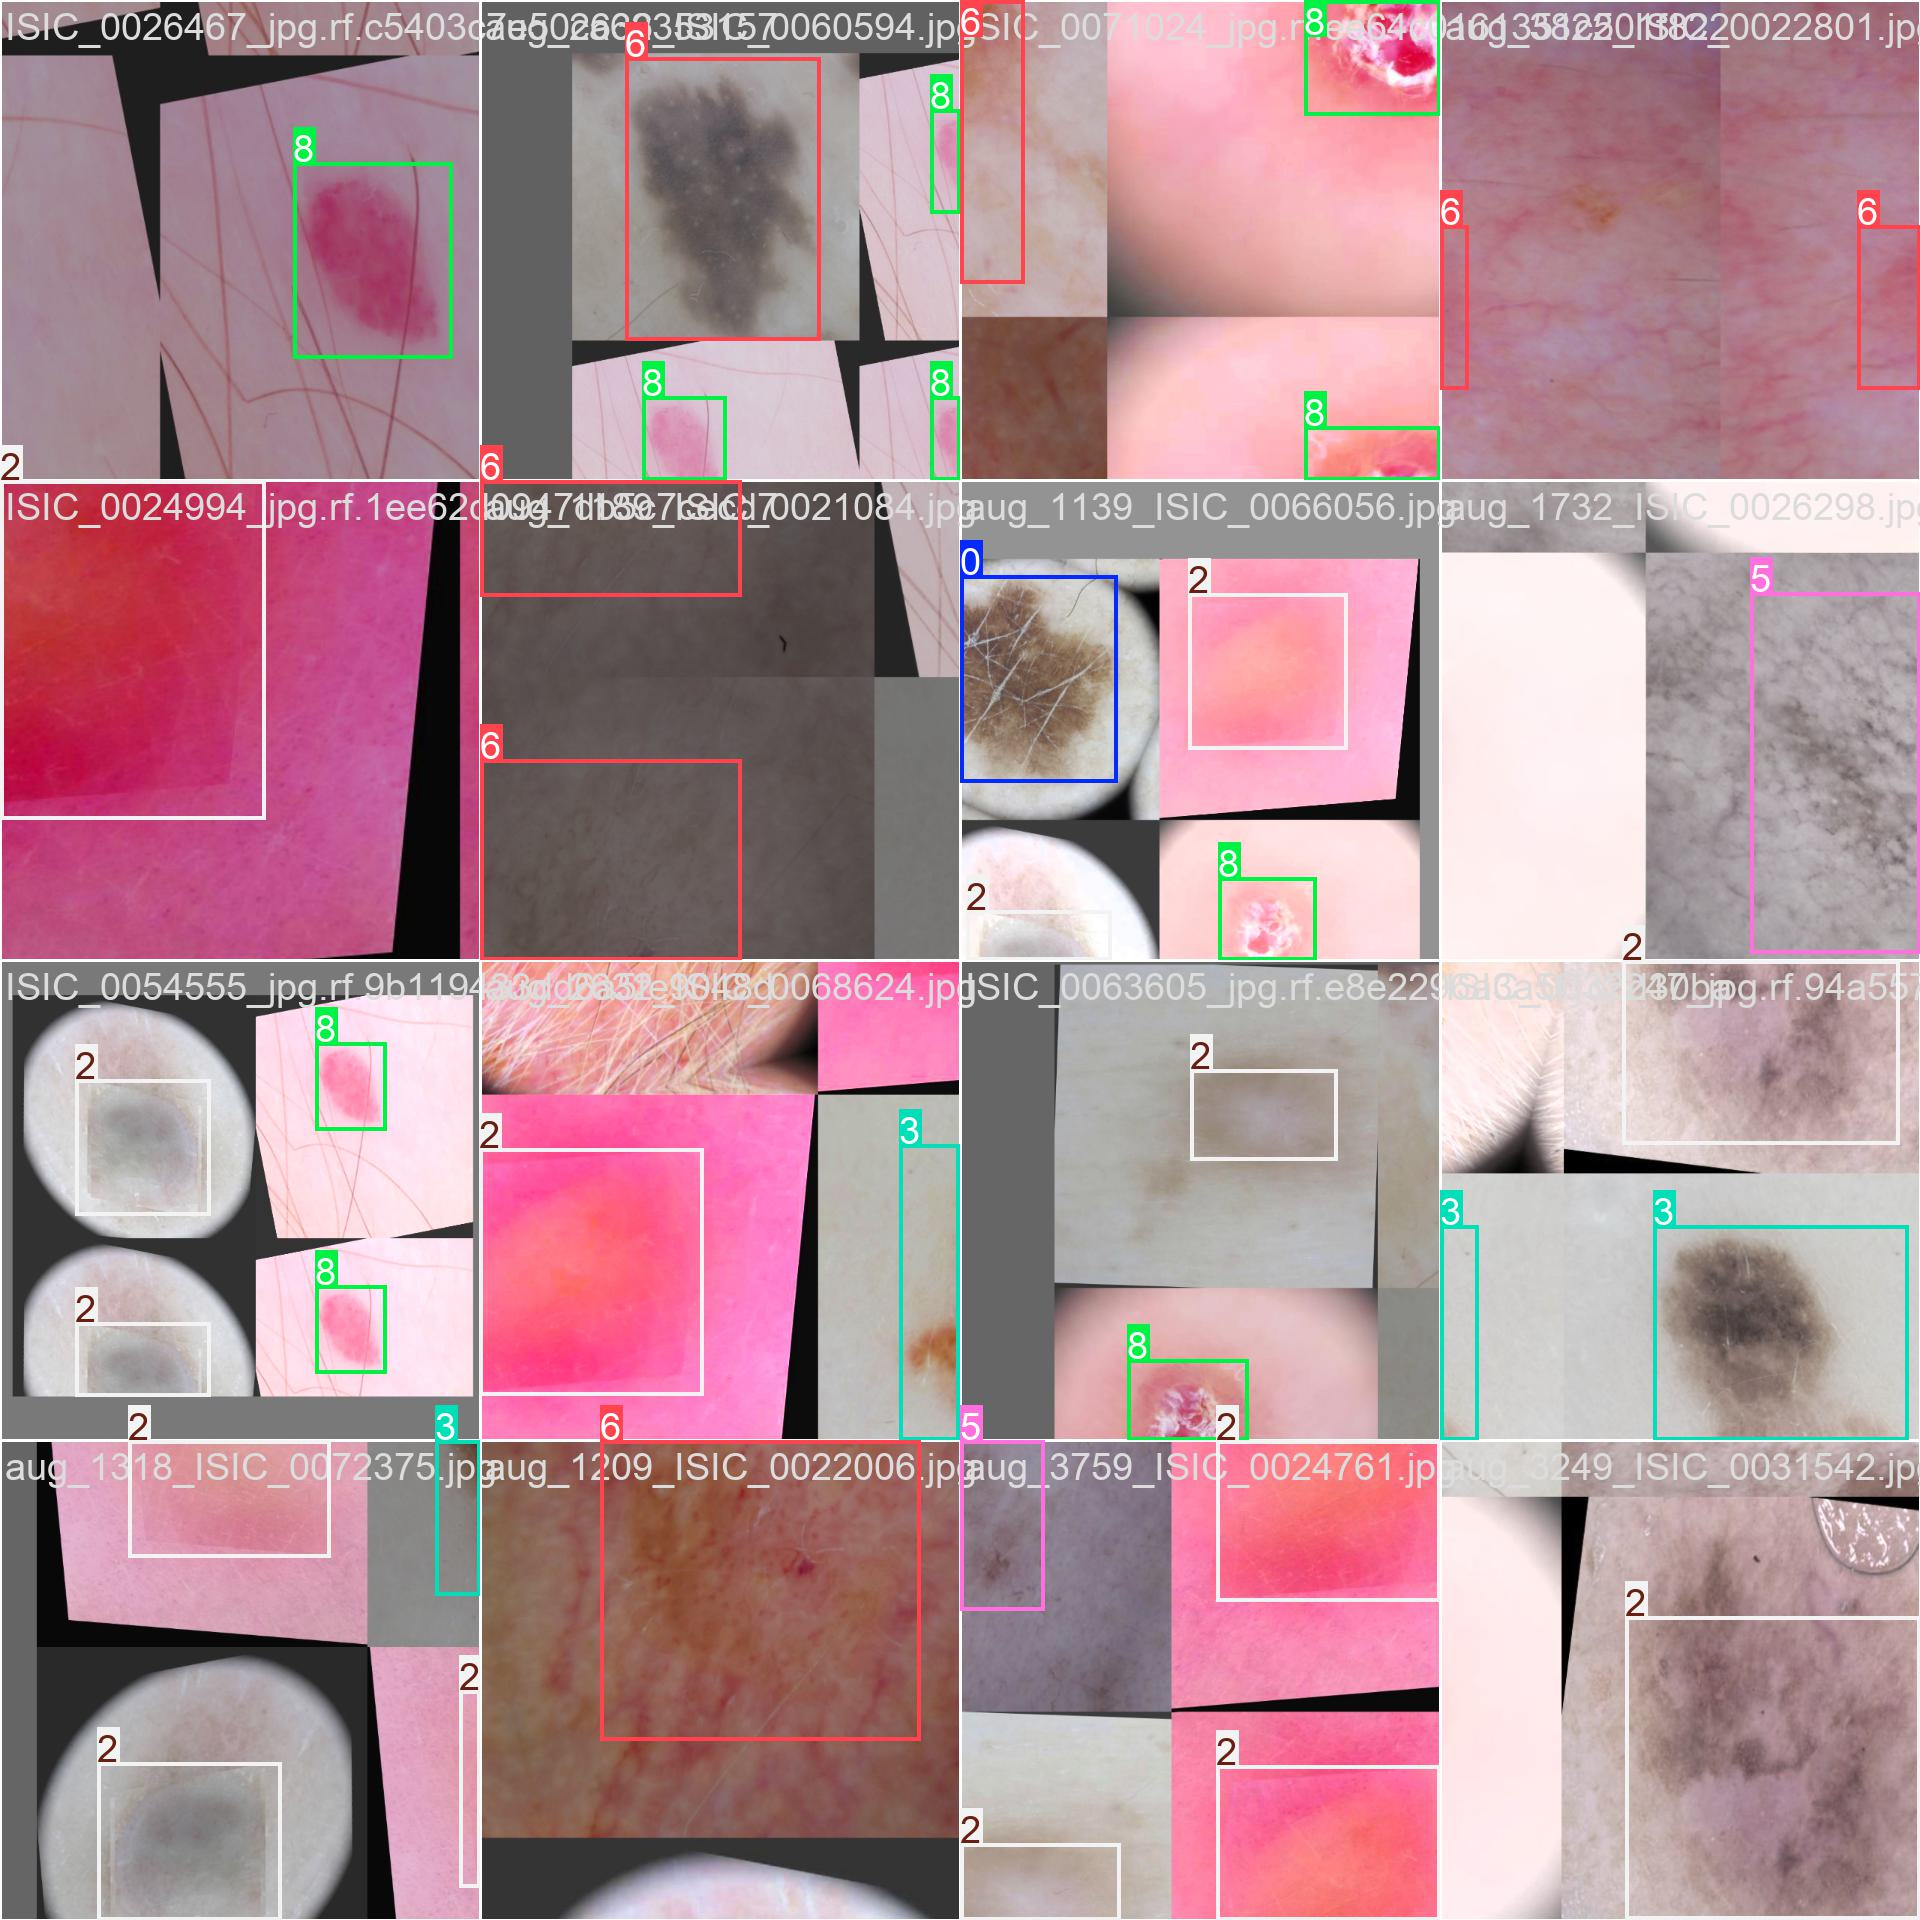

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch1.jpg', width=600)

## Validating

In [33]:
%cd {HOME}

!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

/athaya
Ultralytics 8.3.4 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
Model summary (fused): 286 layers, 39,439,723 parameters, 0 gradients, 145.2 GFLOPs
val: Scanning /athaya/datasets/valid/labels.cache... 1724 images, 0 backgrounds,
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1724       1724       0.81      0.797       0.84      0.738
     actinic keratosis        186        186      0.768      0.618       0.71      0.541
  basal cell carcinoma        181        181      0.574      0.789      0.738      0.595
          dermatofibra        200        200      0.972          1      0.993      0.935
              melanoma        194        194      0.729      0.711      0.764      0.669
                 nevus        189        189      0.832      0.884      0.926      0.844
pigmented benign keratosis        197        197      0.889      0.931      0.964      0.862
  seborrheic keratosis       

Ground Truth


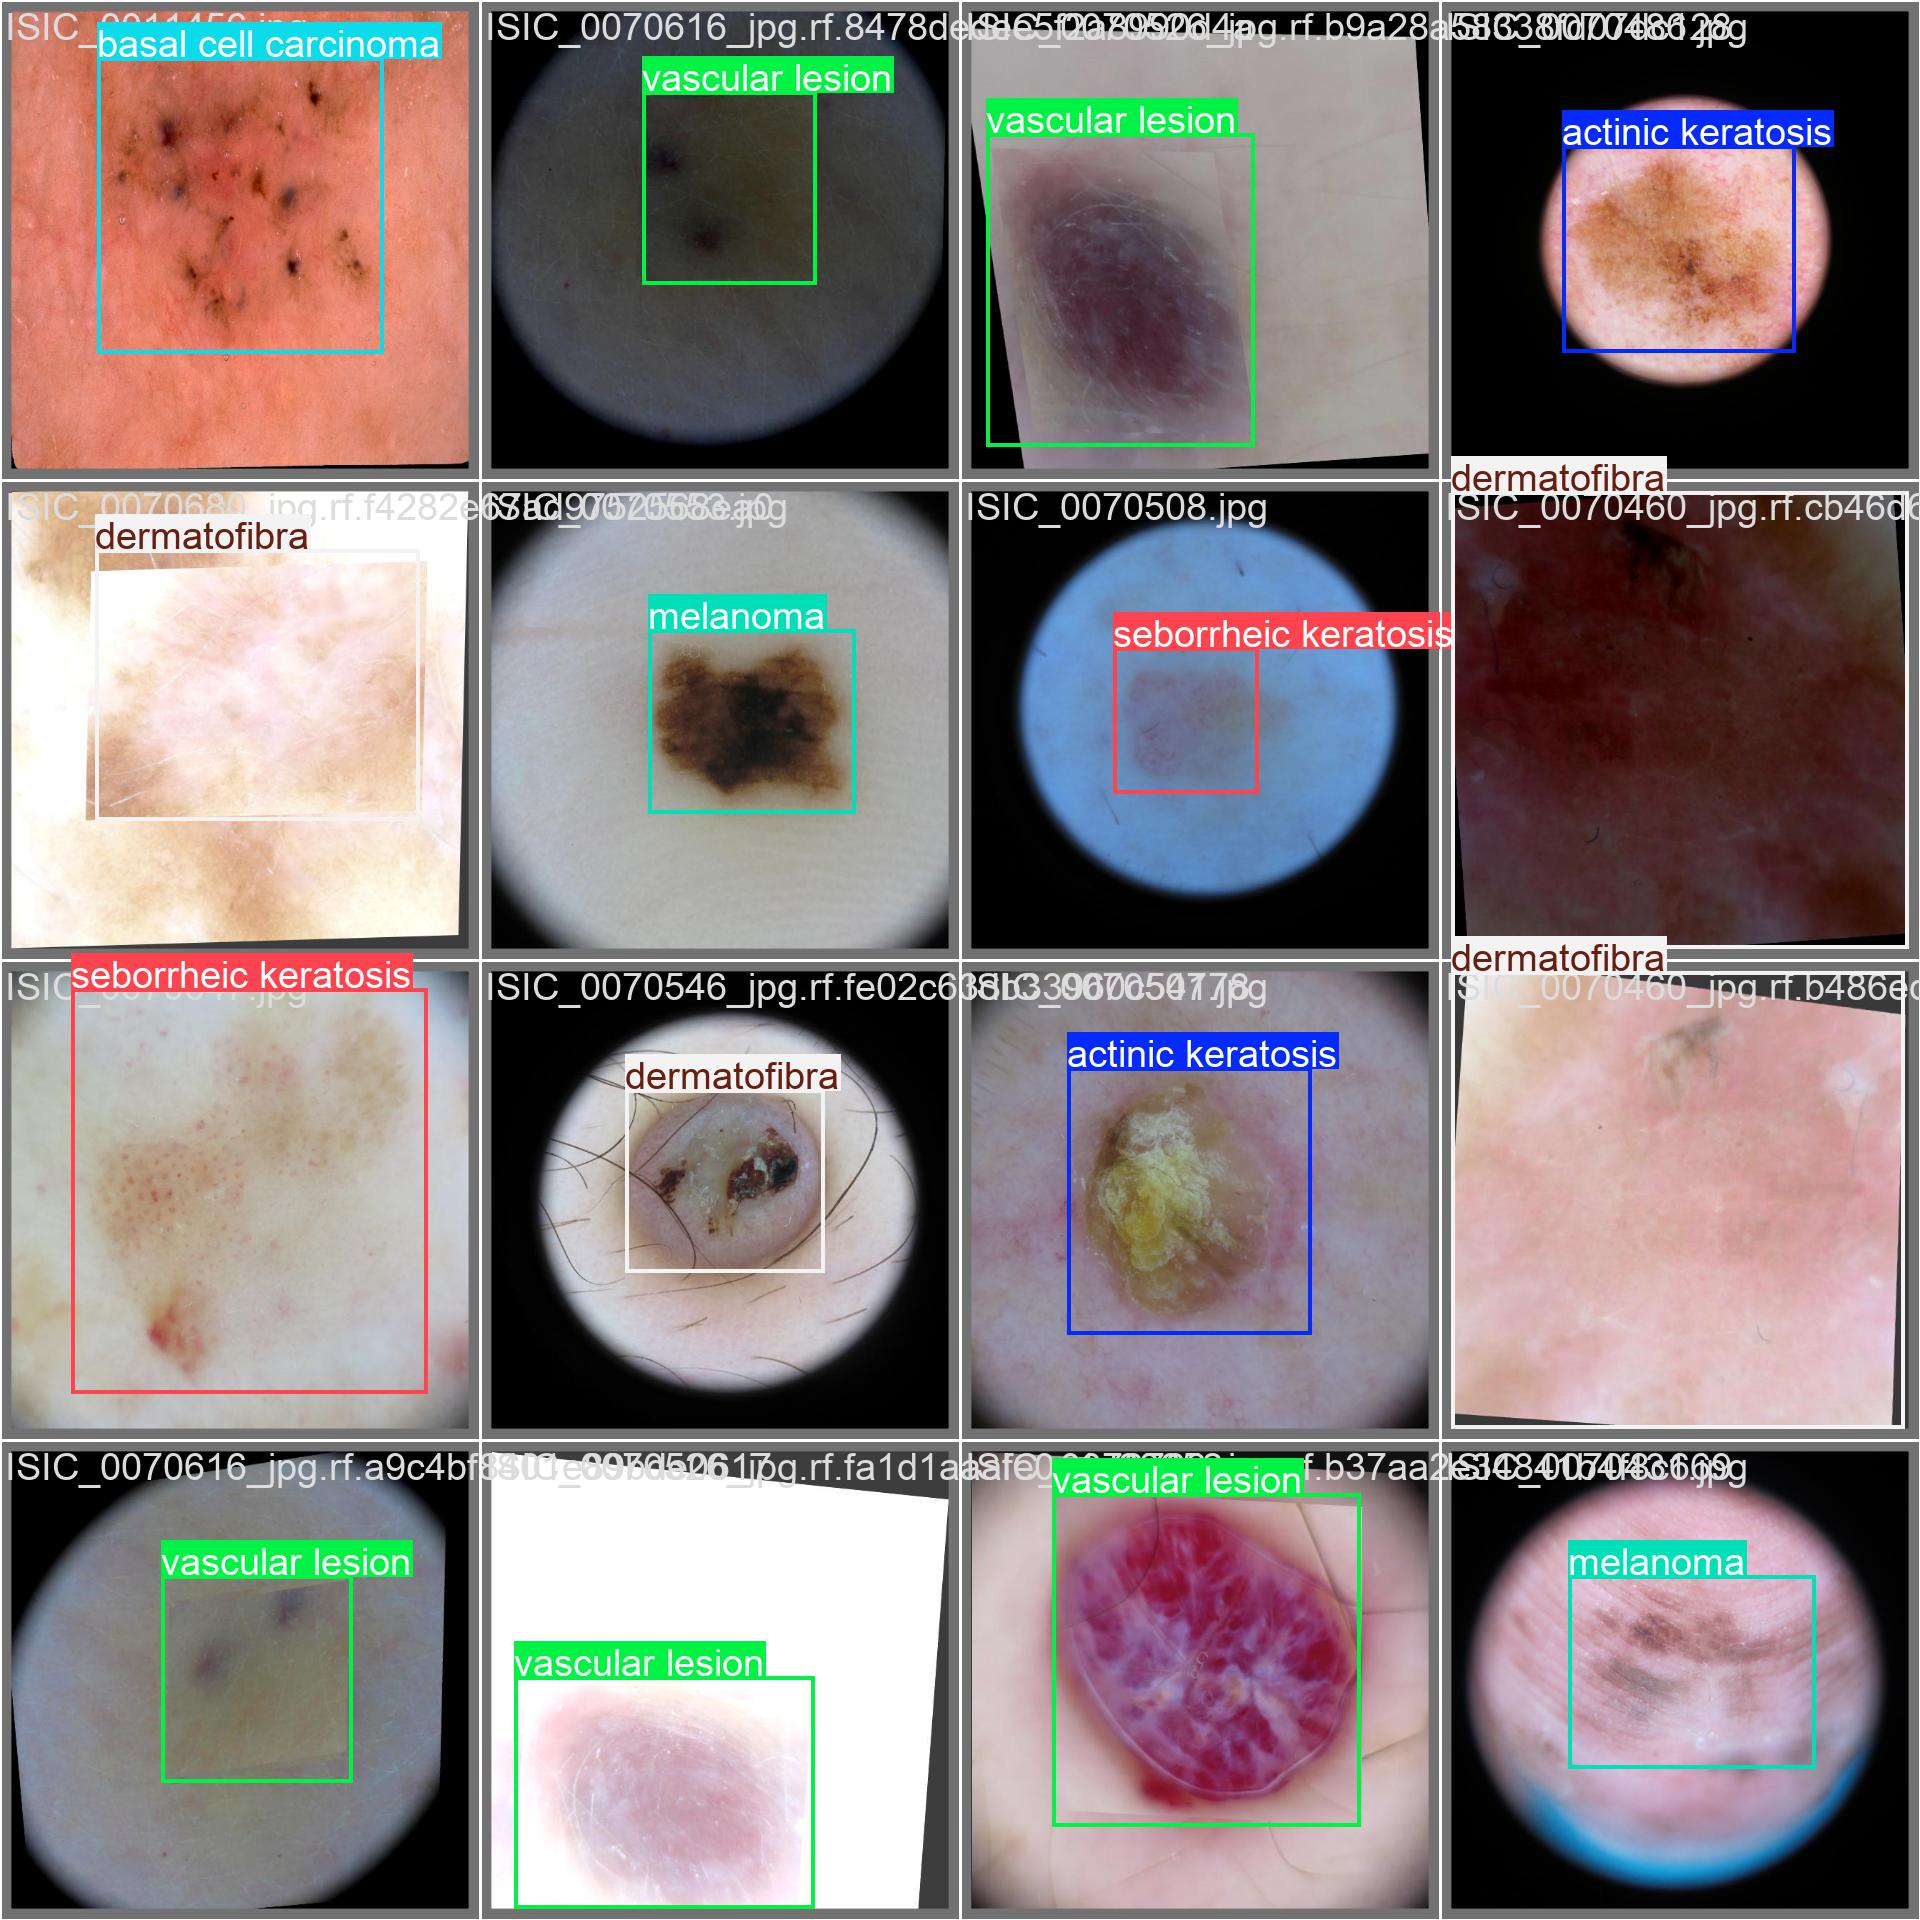


Prediction



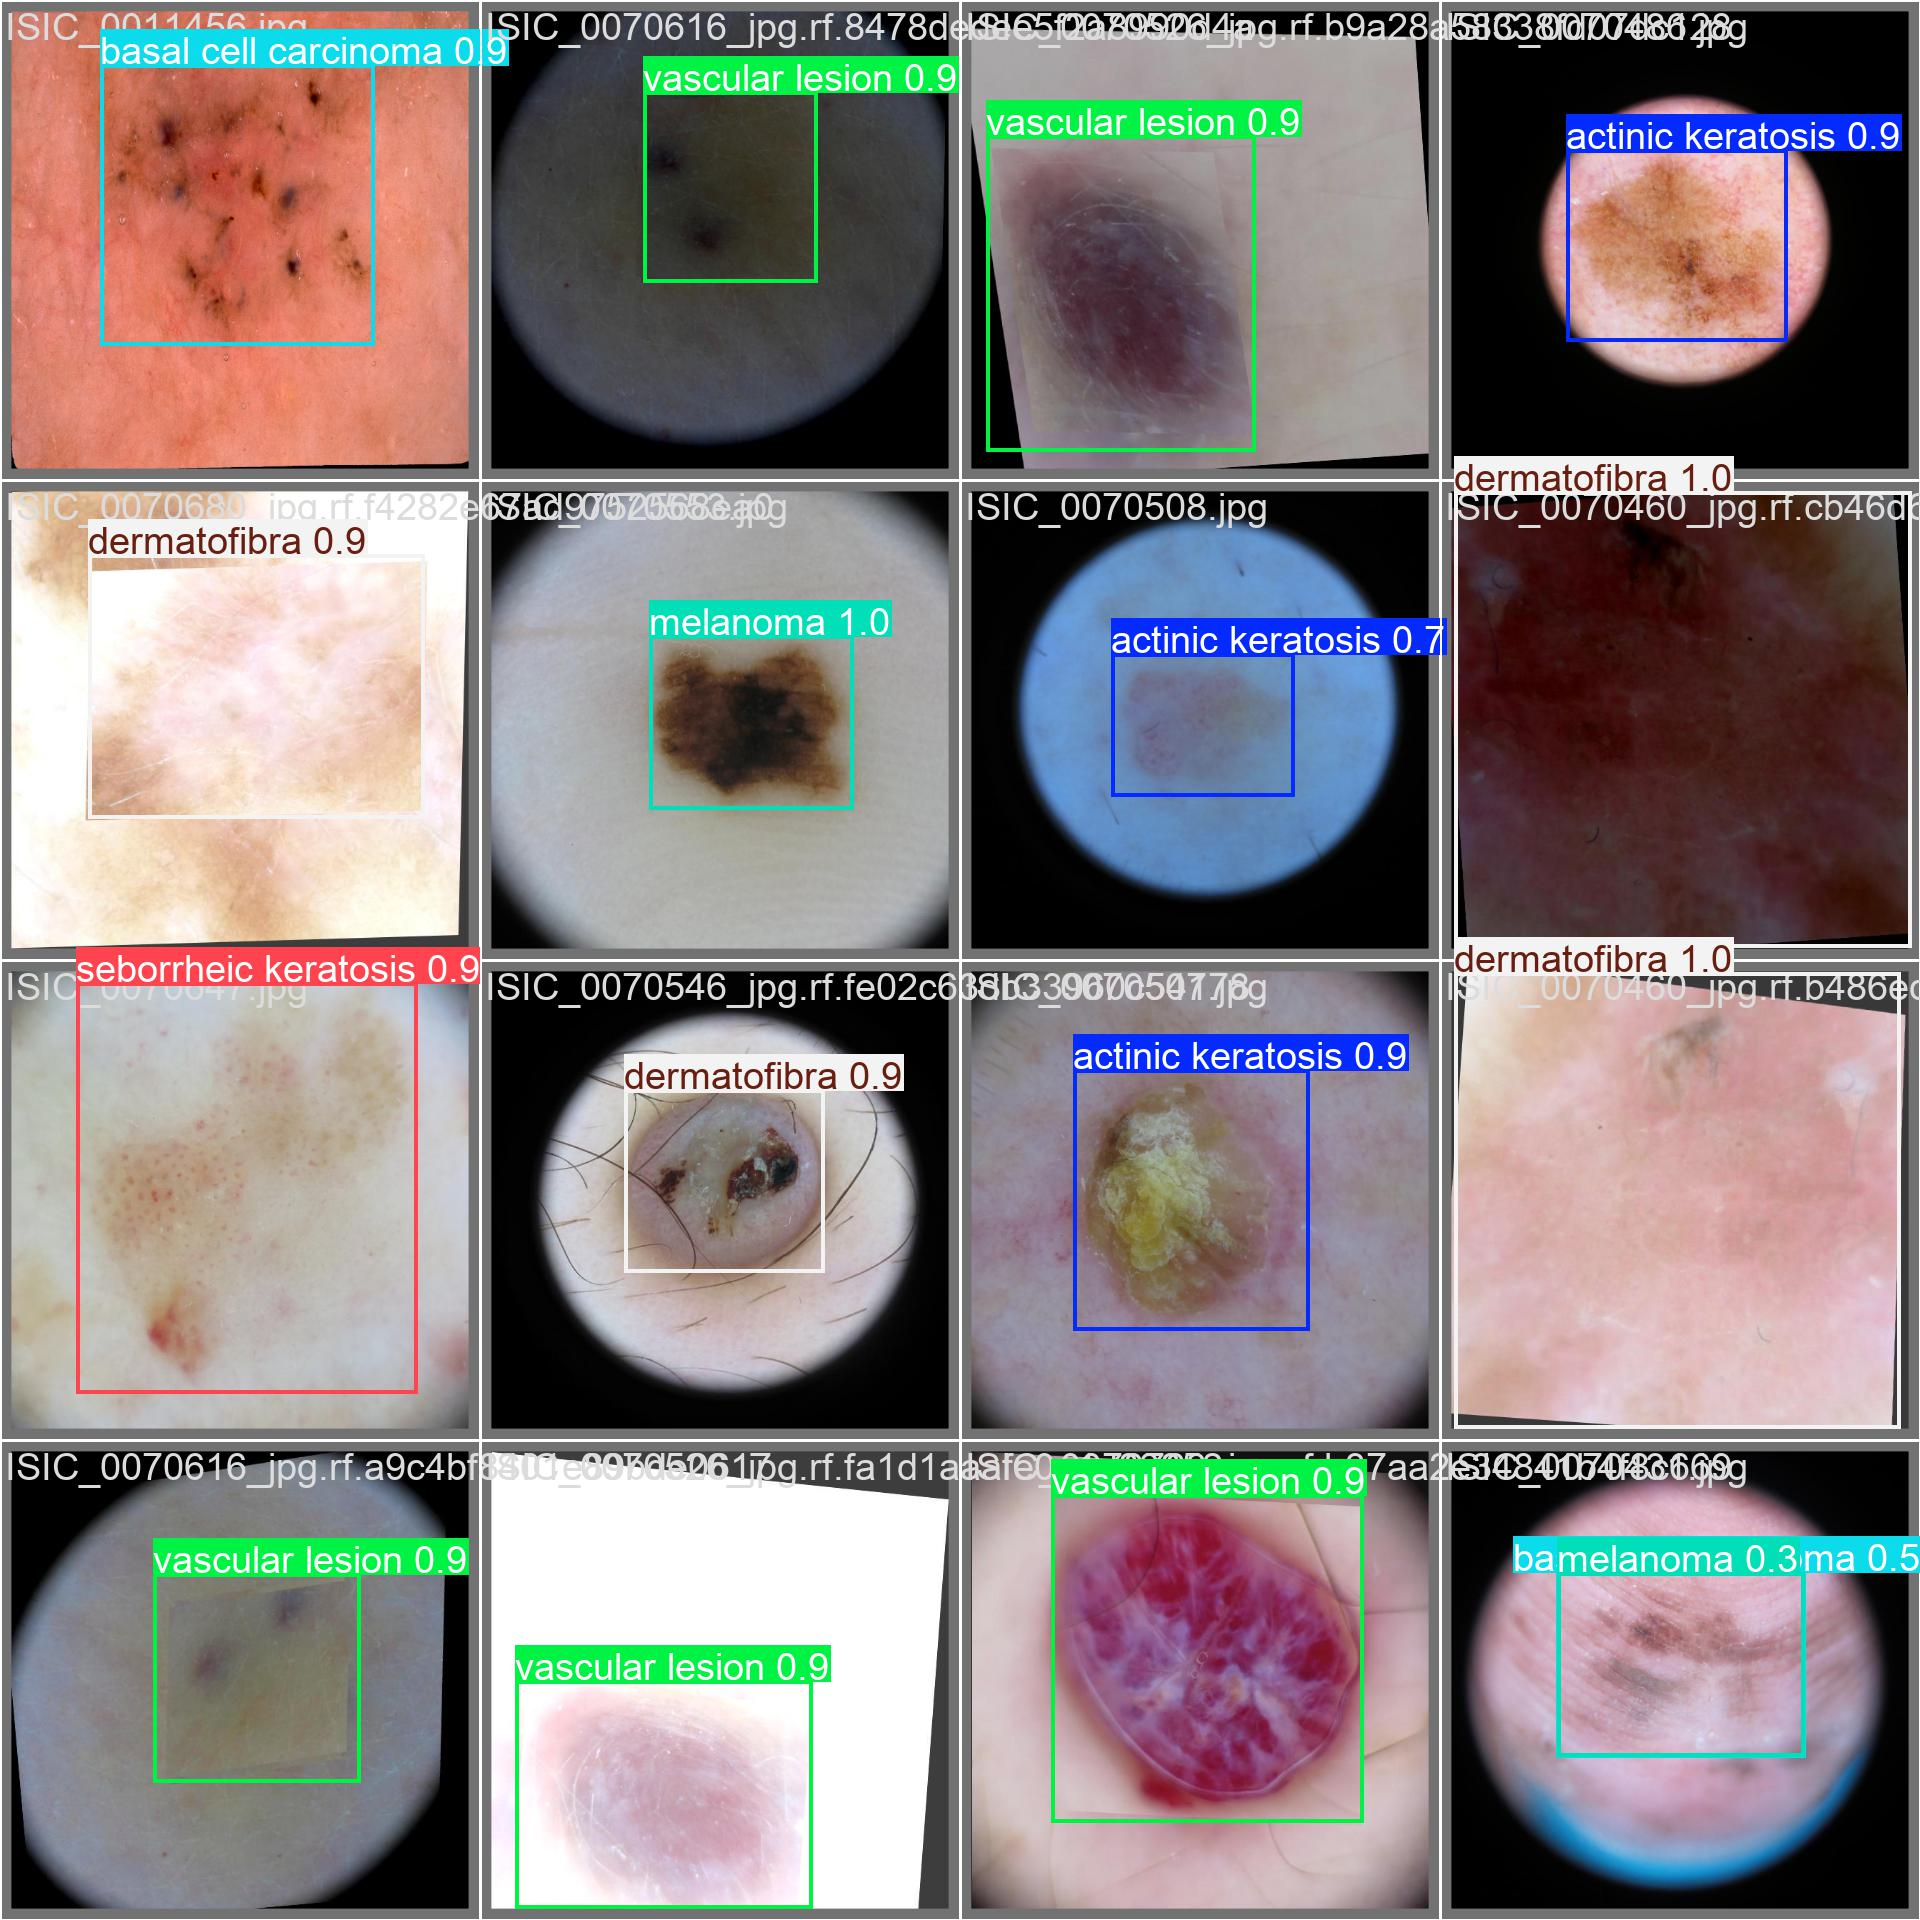

In [34]:
print("Ground Truth")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch0_labels.jpg', width=500))
print("\nPrediction\n")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=500))

Ground Truth


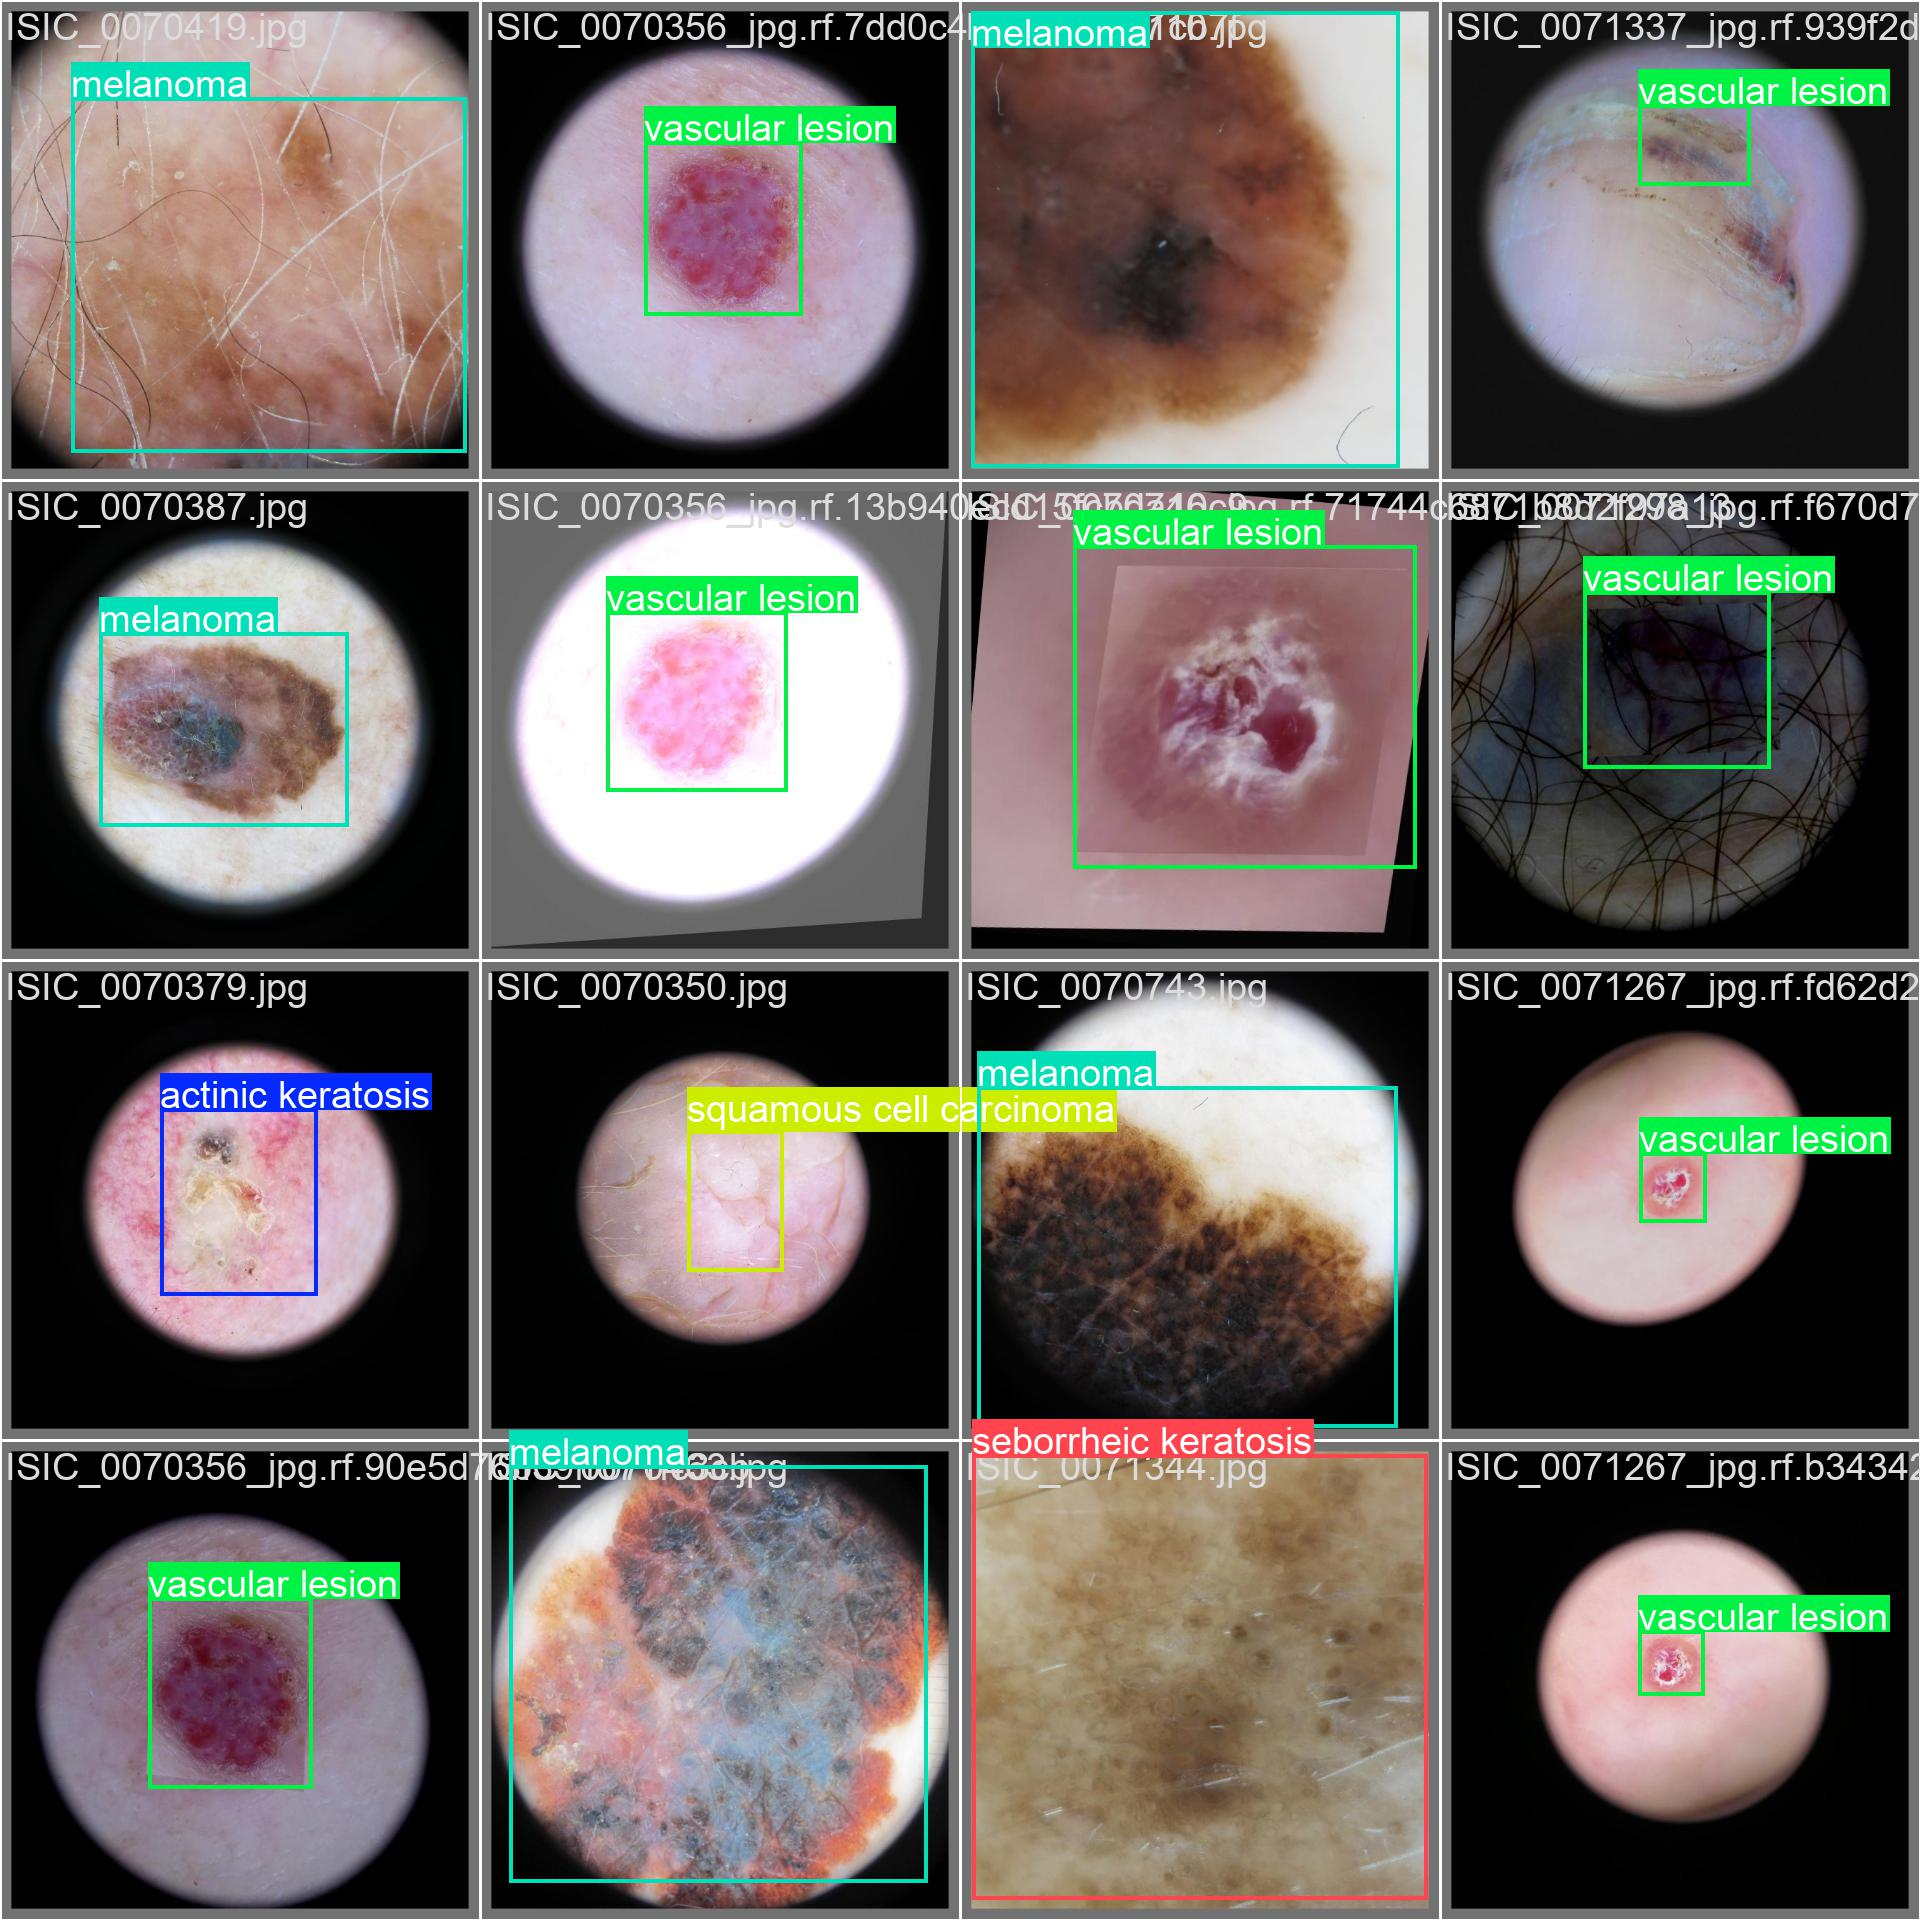


Prediction



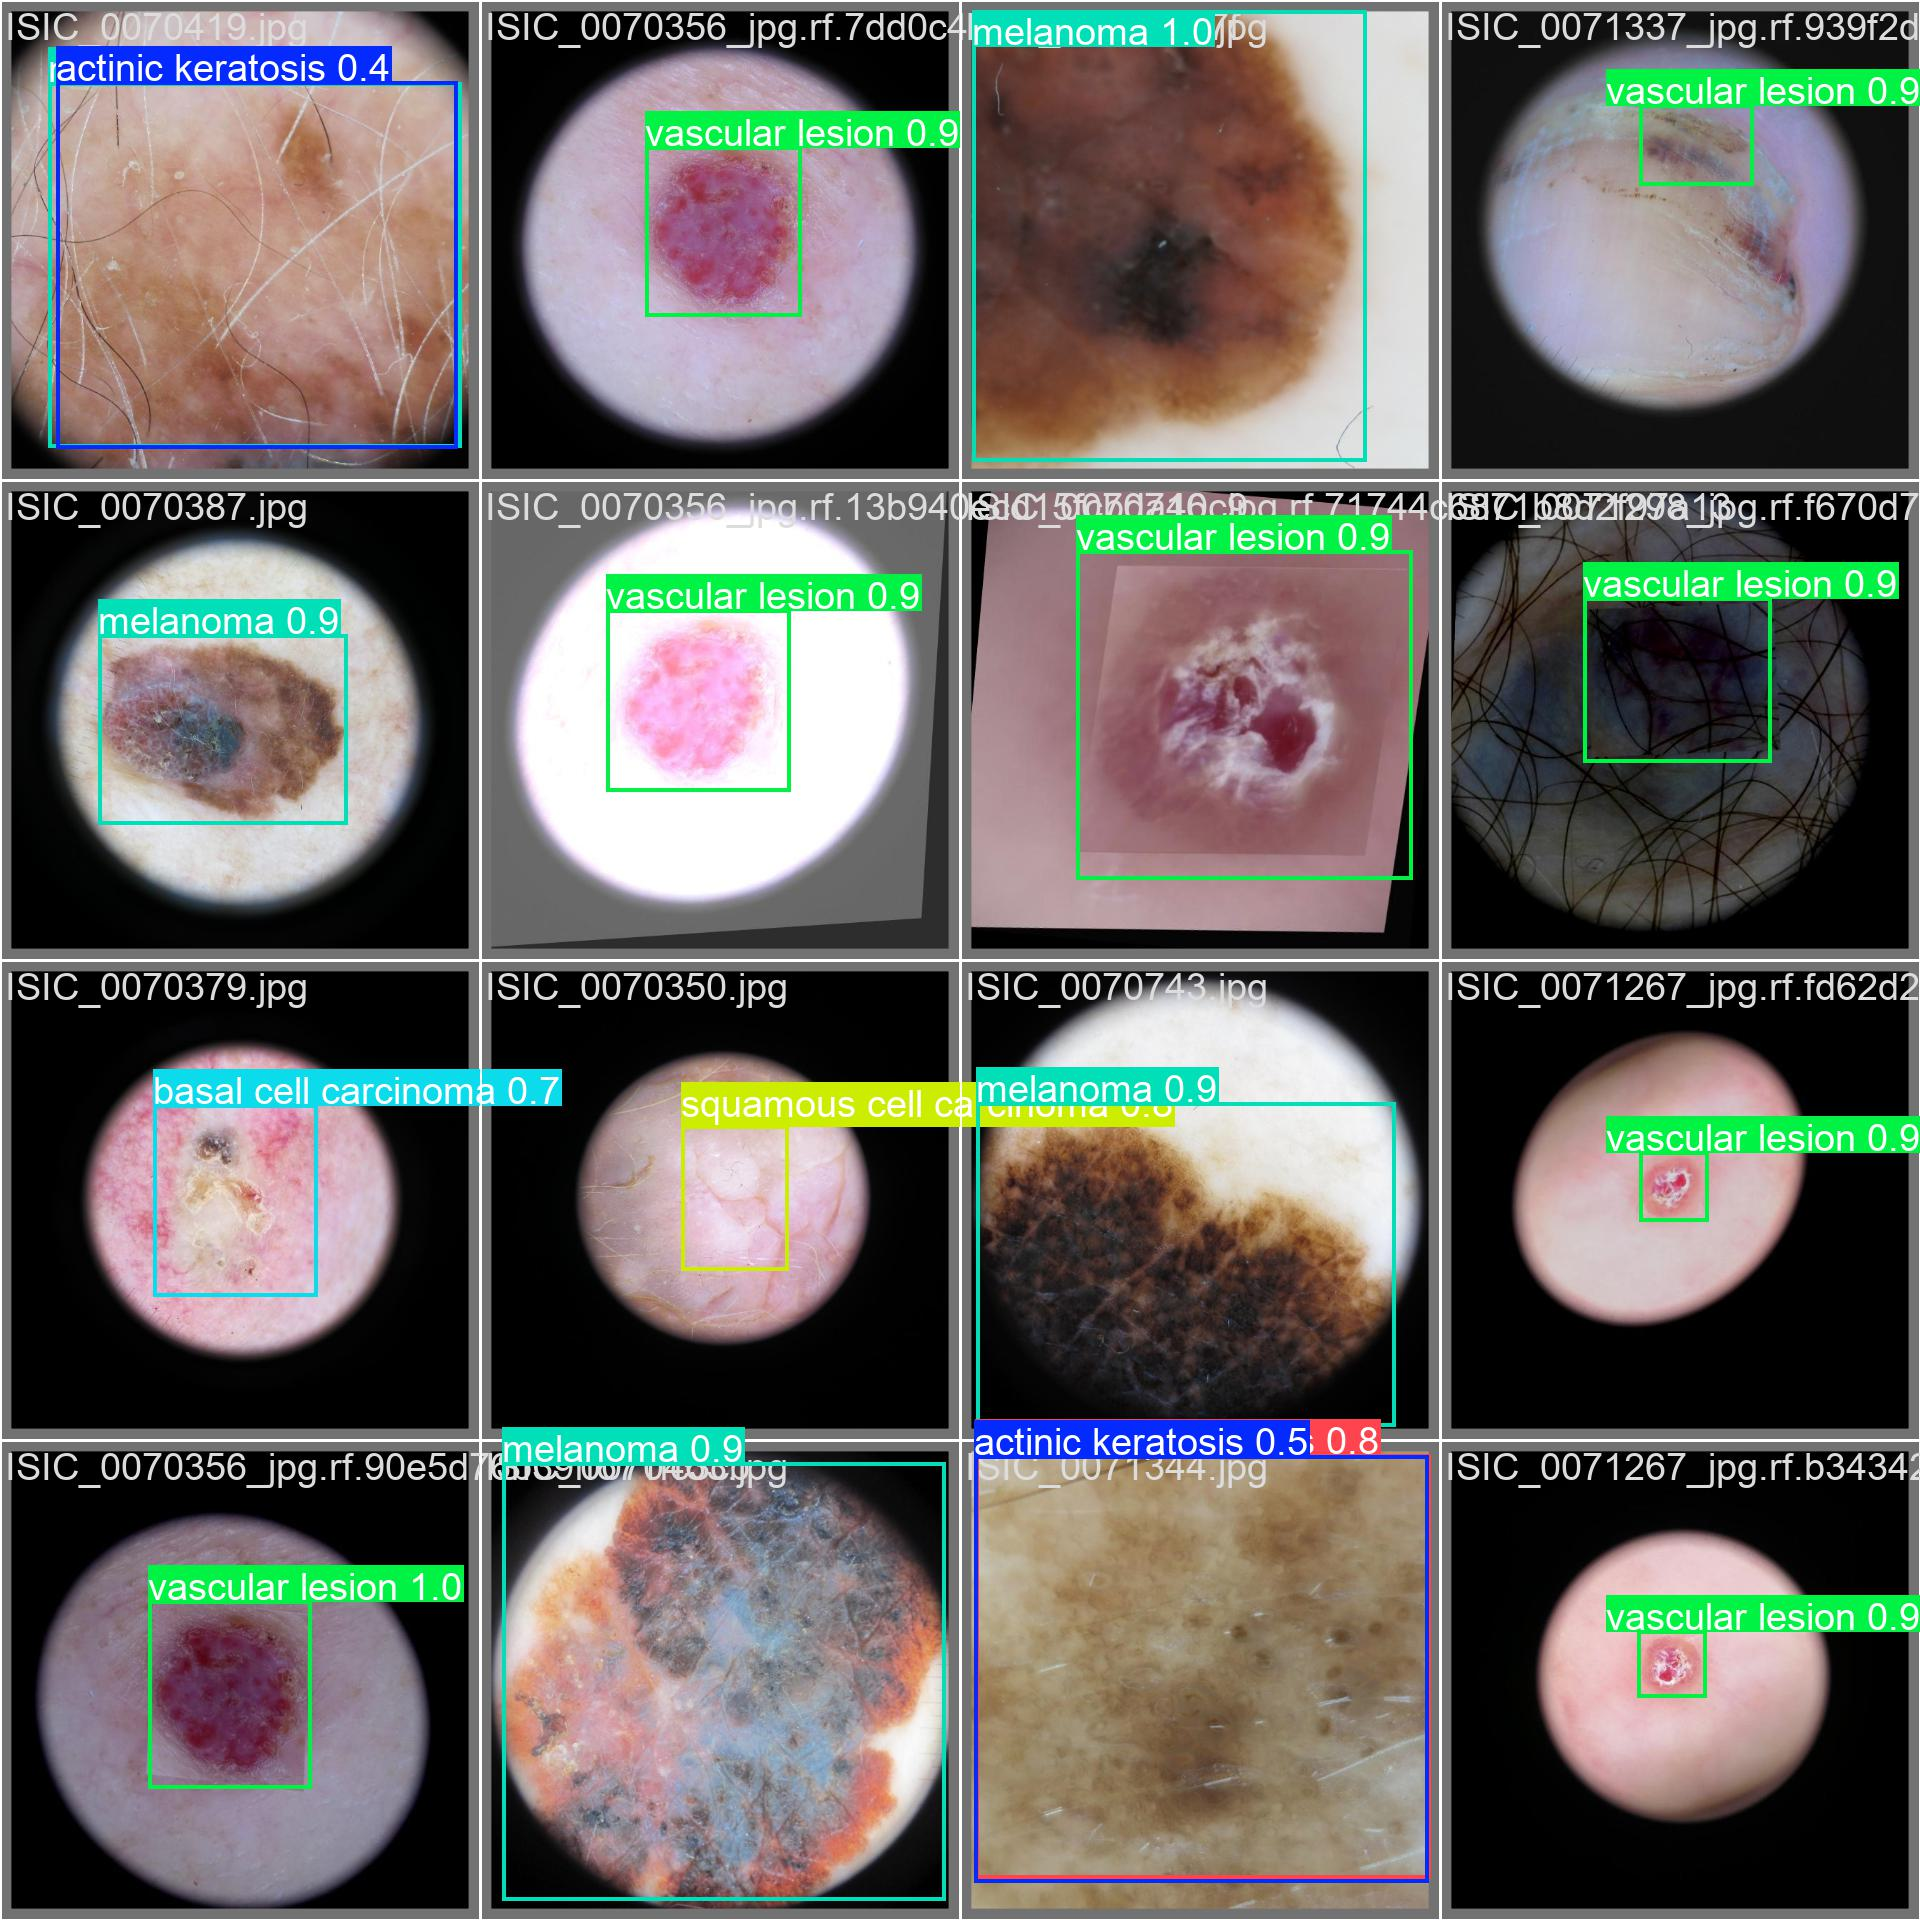

In [35]:
print("Ground Truth")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch1_labels.jpg', width=500))
print("\nPrediction\n")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch1_pred.jpg', width=500))

Ground Truth


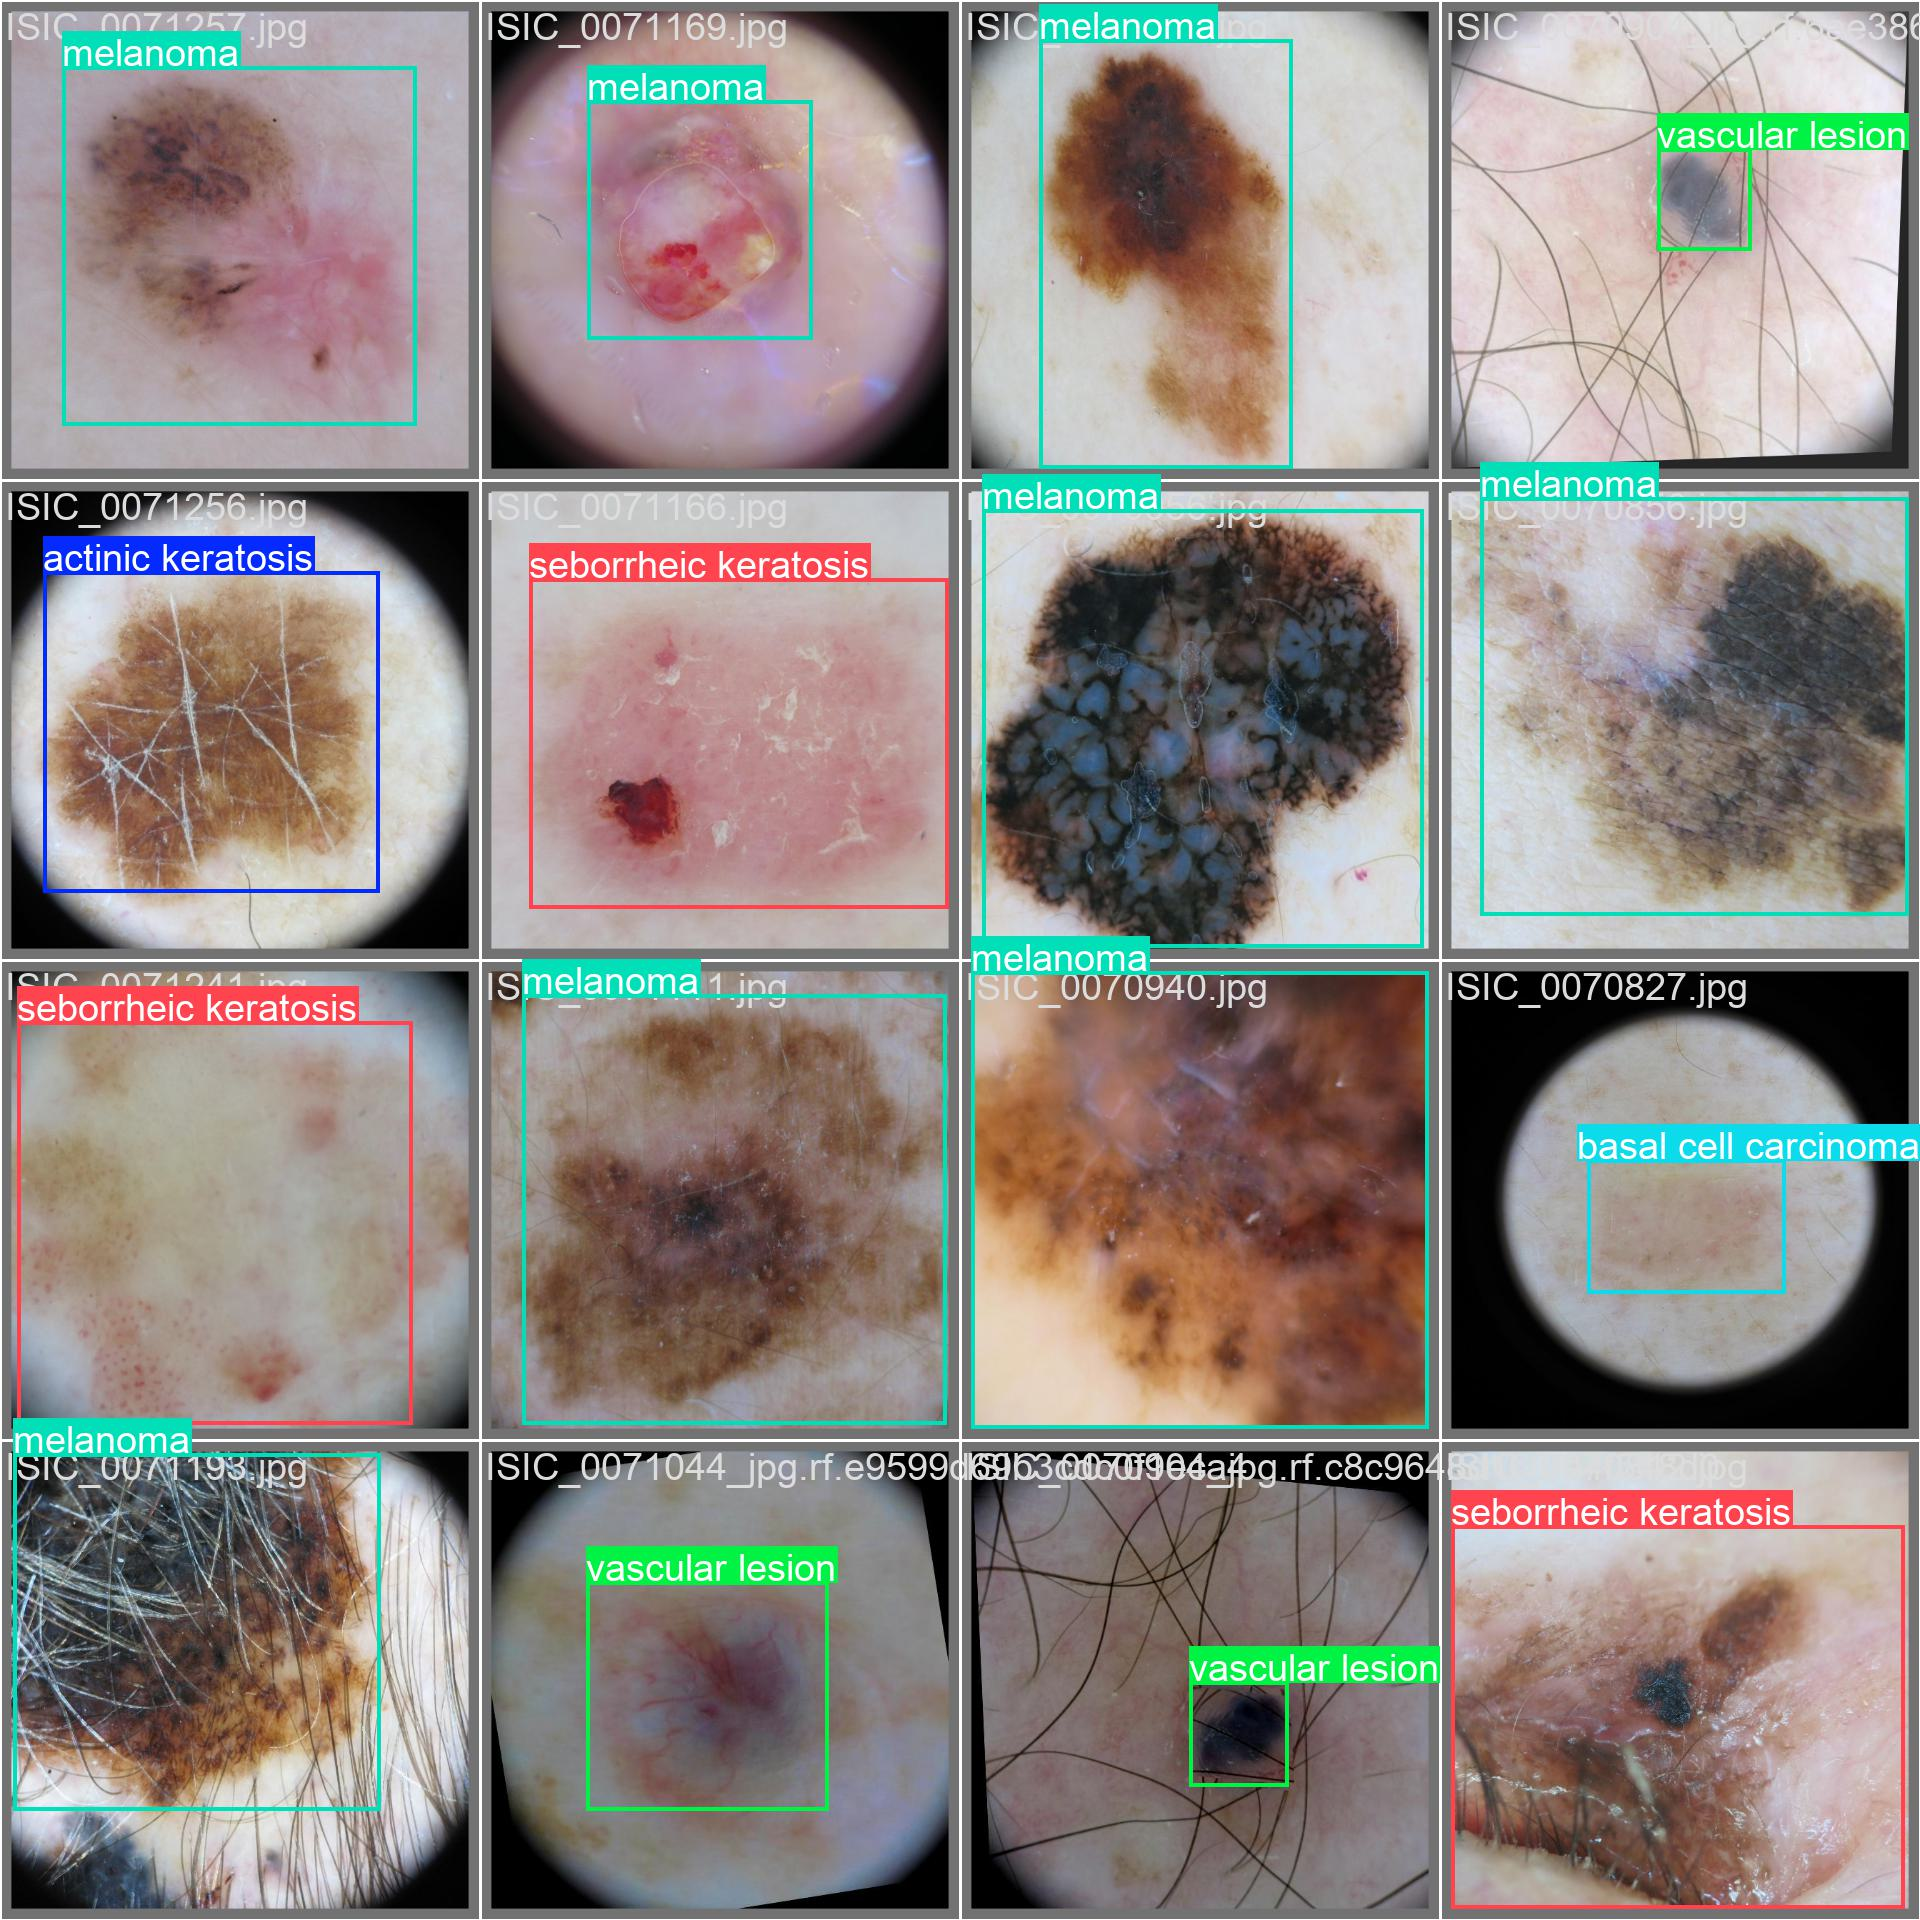


Prediction



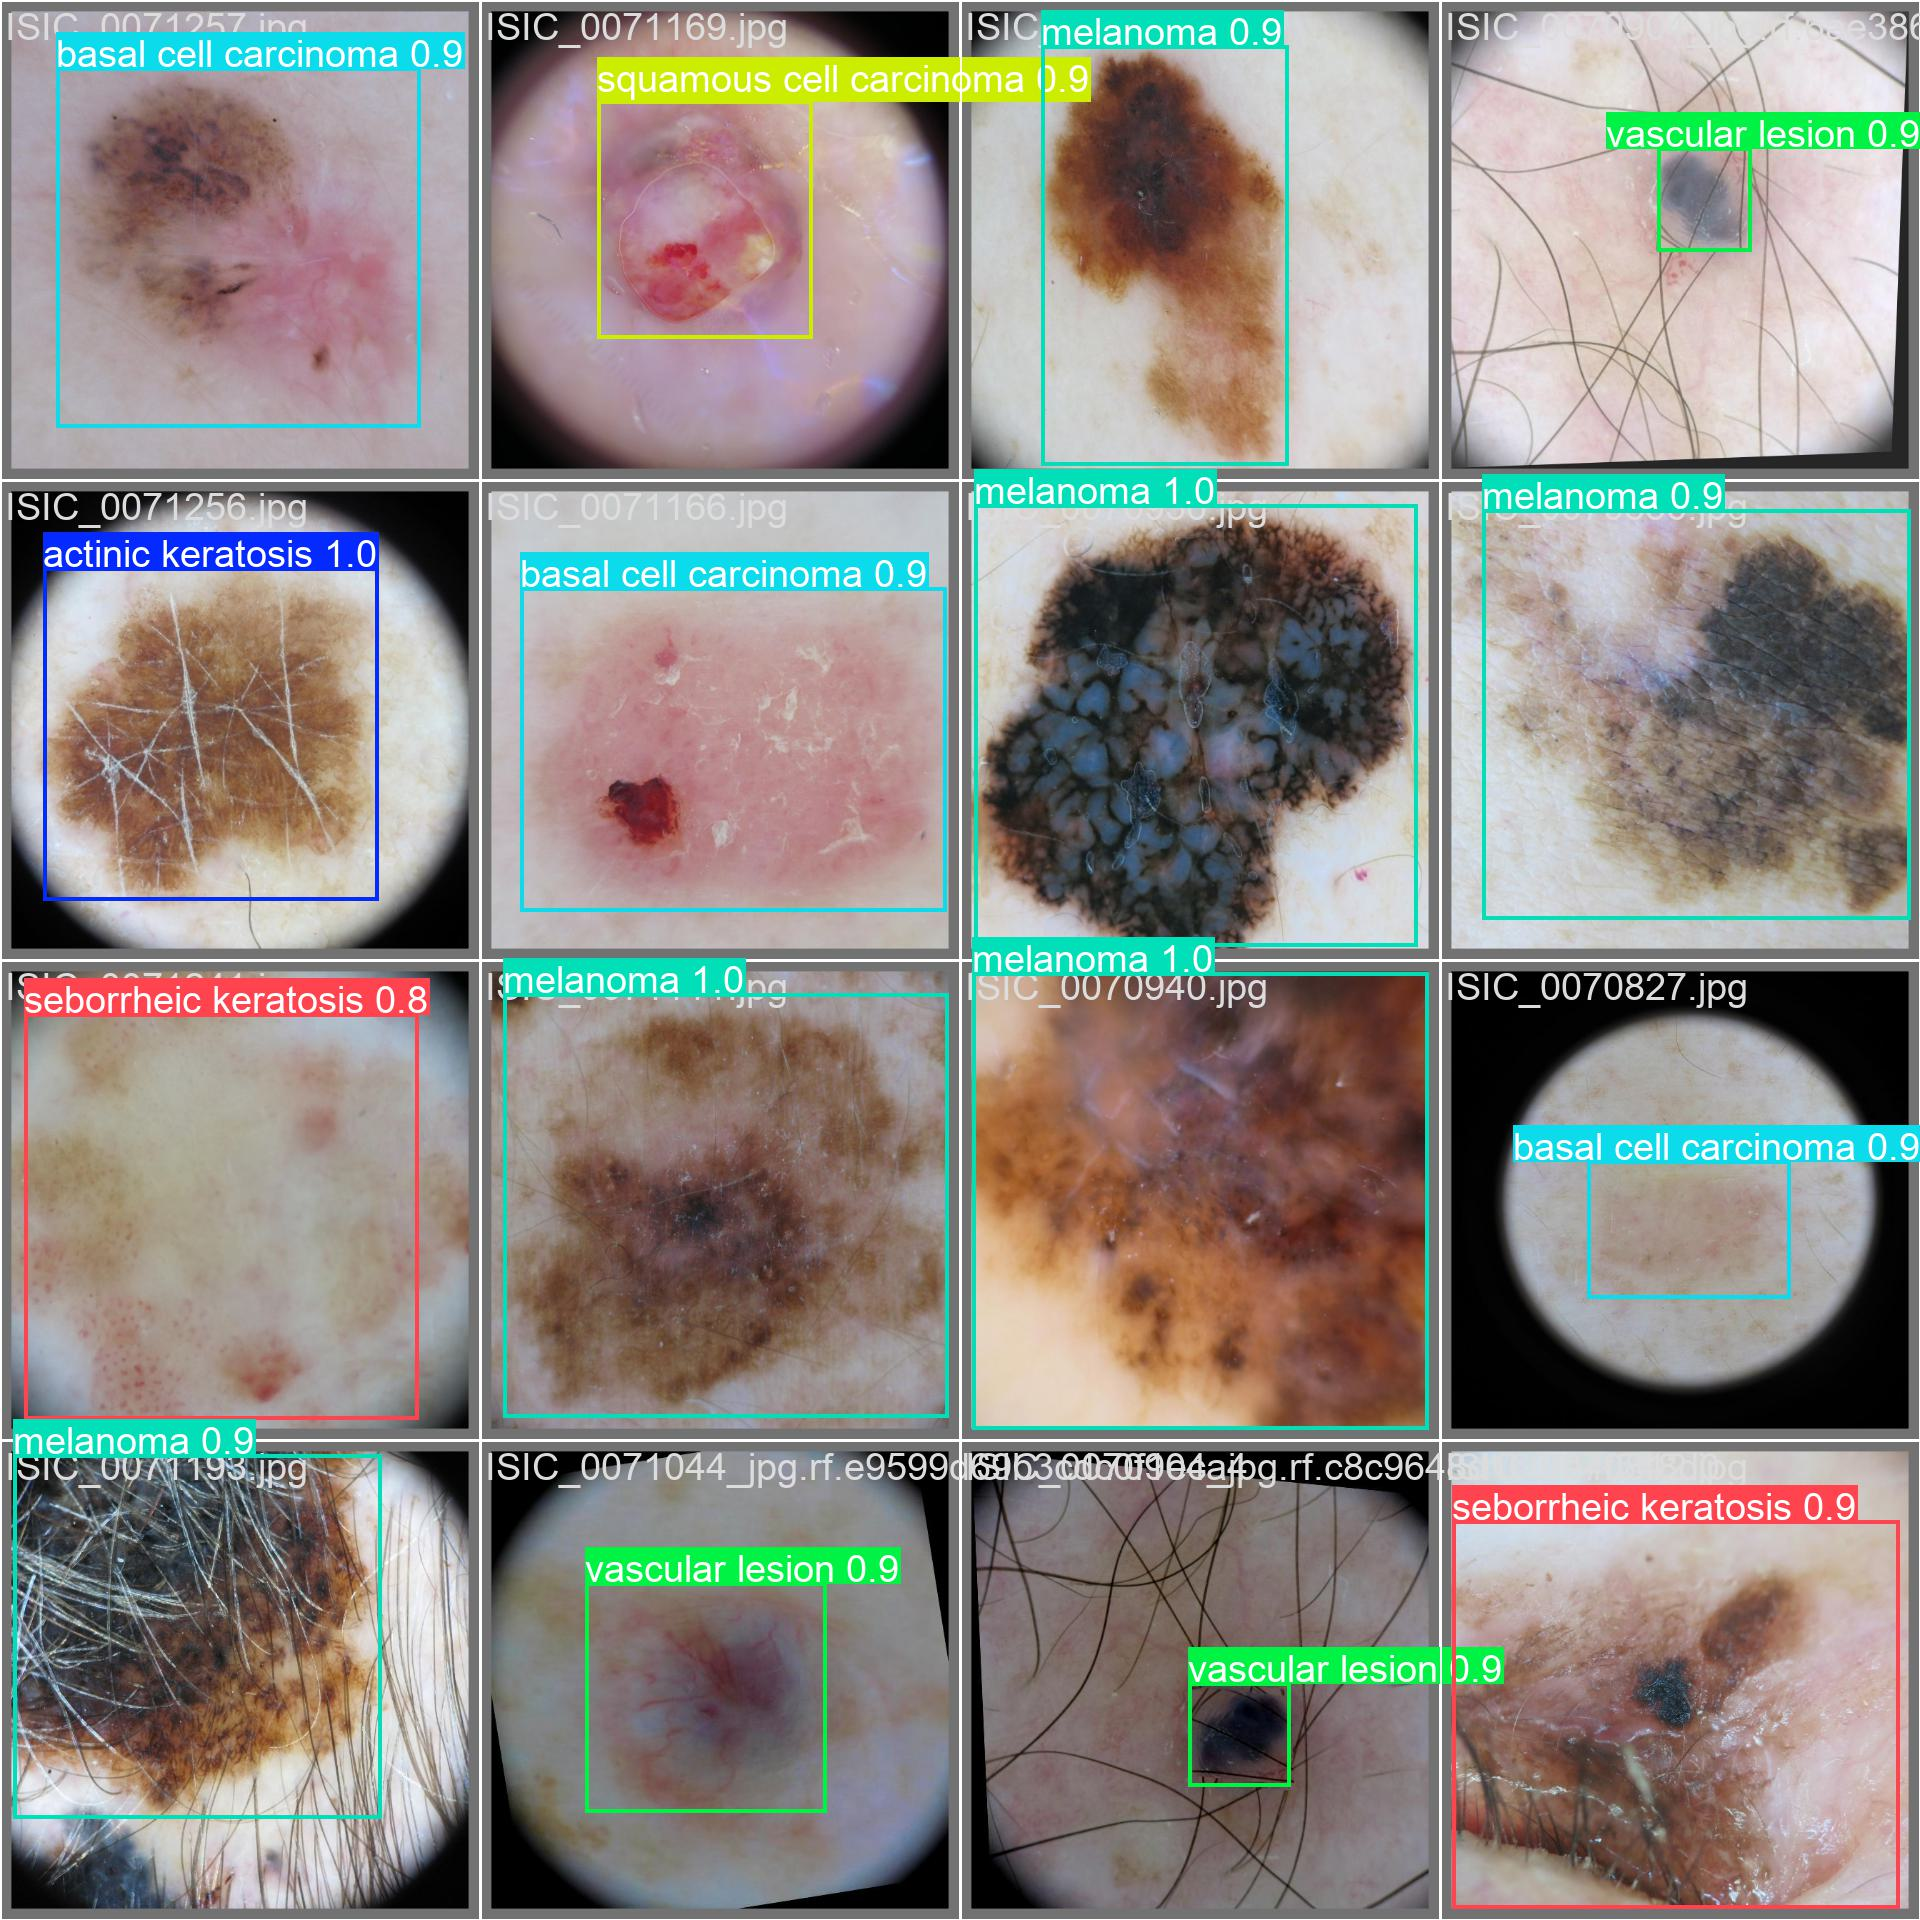

In [36]:
print("Ground Truth")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch2_labels.jpg', width=500))
print("\nPrediction\n")
display(Image(filename=f'{HOME}/runs/detect/val/val_batch2_pred.jpg', width=500))

## Testing

ubah dulu data.yaml nya jadi val:../test

In [37]:
%cd {HOME}
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt conf=0.25 data=data.yaml save=True

/athaya
Ultralytics 8.3.4 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
Model summary (fused): 286 layers, 39,439,723 parameters, 0 gradients, 145.2 GFLOPs
val: Scanning /athaya/datasets/test/labels... 431 images, 0 backgrounds, 0 corru
val: New cache created: /athaya/datasets/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        431        431      0.819       0.77      0.819      0.734
     actinic keratosis         45         45      0.724      0.526      0.571      0.455
  basal cell carcinoma         45         45      0.603      0.743       0.76      0.617
          dermatofibra         50         50       0.94          1      0.988      0.919
              melanoma         49         49      0.816      0.551      0.706      0.665
                 nevus         46         46      0.817      0.913      0.921       0.82
pigmented benign keratosis         49         49      0.961    

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=datasets/test/images save=True

/athaya
Ultralytics 8.3.4 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
Model summary (fused): 286 layers, 39,439,723 parameters, 0 gradients, 145.2 GFLOPs

image 1/431 /athaya/datasets/test/images/ISIC_0011869.jpg: 640x640 1 basal cell carcinoma, 8.1ms
image 2/431 /athaya/datasets/test/images/ISIC_0012090.jpg: 640x640 1 seborrheic keratosis, 8.1ms
image 3/431 /athaya/datasets/test/images/ISIC_0012289.jpg: 640x640 (no detections), 7.4ms
image 4/431 /athaya/datasets/test/images/ISIC_0012341.jpg: 640x640 1 actinic keratosis, 7.1ms
image 5/431 /athaya/datasets/test/images/ISIC_0012352.jpg: 640x640 1 actinic keratosis, 7.1ms
image 6/431 /athaya/datasets/test/images/ISIC_0012364.jpg: 640x640 1 seborrheic keratosis, 7.3ms
image 7/431 /athaya/datasets/test/images/ISIC_0012720.jpg: 640x640 1 seborrheic keratosis, 7.1ms
image 8/431 /athaya/datasets/test/images/ISIC_0012815.jpg: 640x640 1 squamous cell carcinoma, 7.1ms
image 9/431 /athaya/datasets/test/images/ISIC_00128

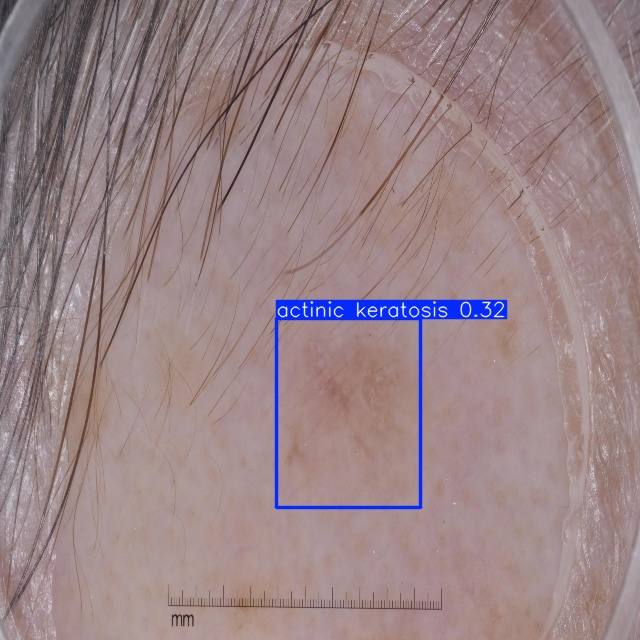

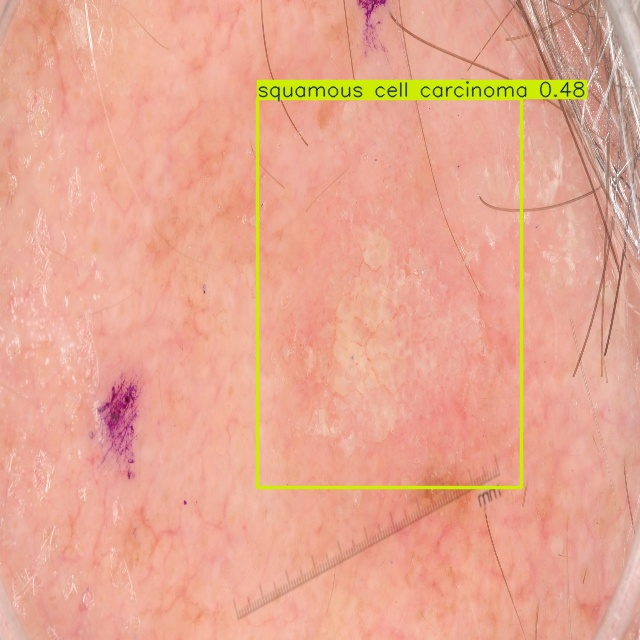

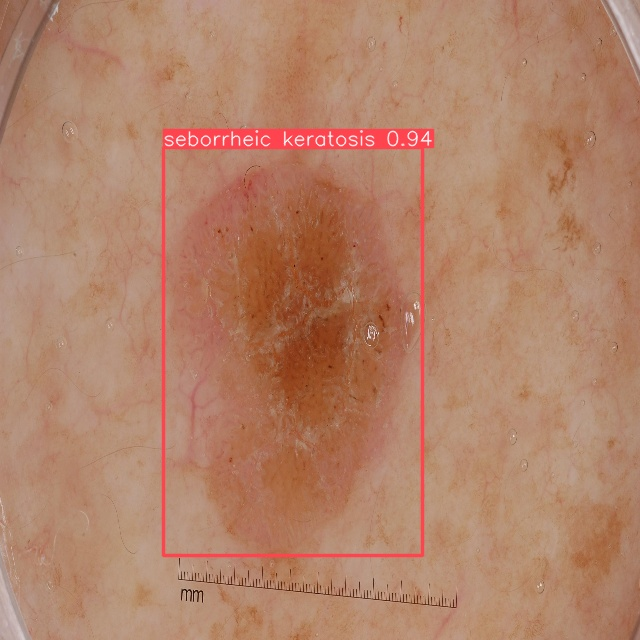

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[4:7]:
  display(Image(filename=image_path, width=600))
  print("\n")

In [ ]:
#download detect folder
import shutil
import os

# Set the folder path you want to zip
folder_to_zip = 'runs/detect'  # replace 'YourFolderName' with the folder name
output_filename = 'detect14.zip'

# Verify the folder exists and has content
if os.path.exists(folder_to_zip) and os.listdir(folder_to_zip):
    # Create a zip file of the folder
    shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

    # Verify if the zip file was created and has content
    if os.path.exists(output_filename) and os.path.getsize(output_filename) > 0:
        print(f"'{output_filename}' created successfully!")
    else:
        print("Zip file is empty or failed to create.")
else:
    print("Folder does not exist or is empty.")

# Provide a link to download the zip file
from IPython.display import FileLink
FileLink(output_filename)
